# (New) Sim2 visualization 

In [49]:
## preliminary
library(tidyverse)
library(gridExtra)
library(patchwork)
library(ggsci)
setwd("/project/Stat/s1155168529/programs/DDML")

## attempt 6: sim2m

Local estimation: partialling out method -> original method

sim2m testing 7:
- baseline setting: n = 300, K = 10

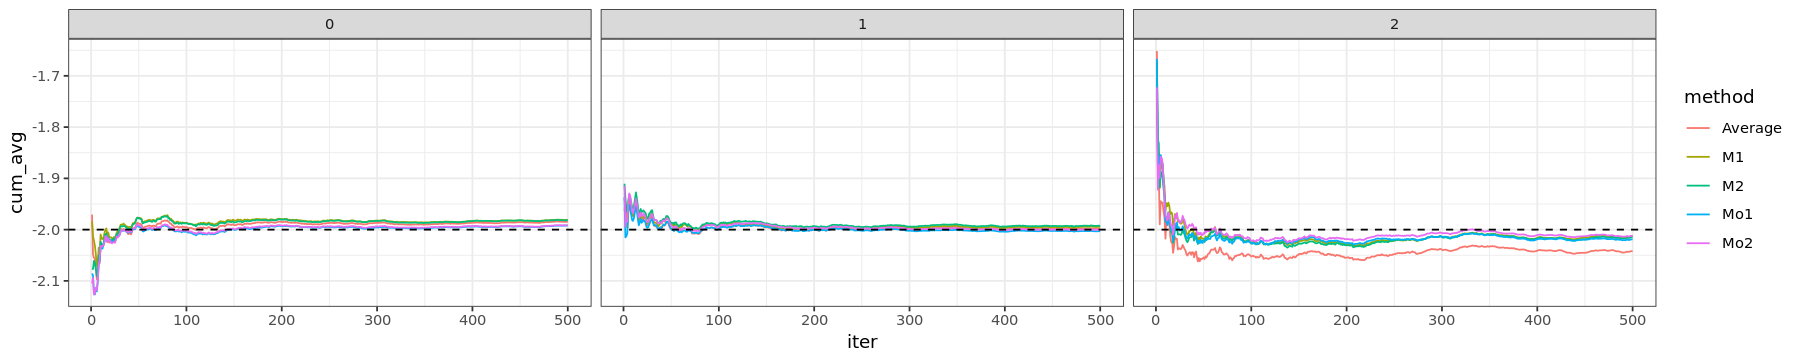

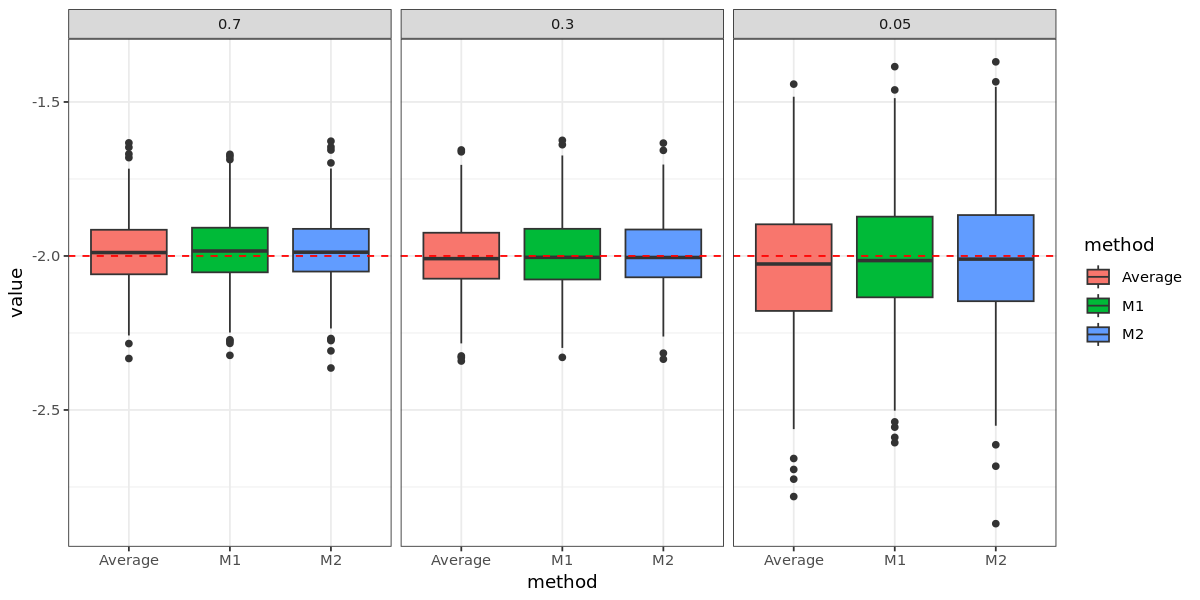

In [2]:
vec_file <- list.files(path = "output")

tib_out <- tibble()

for (
    path_cur in file.path(
        "output", 
        vec_file[str_detect(vec_file, "out_sim2m_t7_beta2.0_ip\\d+.csv")] 
    )
) {
    tib_out <- bind_rows(
        tib_out, 
        read_csv(file = path_cur, show_col_types = FALSE) %>% 
            mutate(d = str_extract(path_cur, "(?<=_ip)\\d+") %>% as.numeric())
    )
}

beta <- -2

tib_out <- tib_out %>% 
    filter_at(
        vars(Average:Mo2), 
        function(x) abs(x - beta) < 2 * abs(beta)
    ) %>% 
    group_by(rnd_np, d) %>%
    # slice_head(n = 1) %>%
    summarise_at(
        vars(Average:Mo2),
        median
        # mean
    ) %>% 
    mutate()


options(repr.plot.width = 15, repr.plot.height = 3)

tib_out %>%
    pivot_longer(
        cols = Average:Mo2, 
        names_to = "method",
        values_to = "value"
    ) %>% 
    group_by(d, method) %>%
    mutate(
        cum_avg = cumsum(value) / row_number()
    ) %>% 
    mutate(iter = factor(rnd_np) %>% as.numeric()) %>%
    ggplot() + 
    geom_line(
        mapping = aes(x = iter, y = cum_avg, color = method)
    ) +
    geom_hline(yintercept = beta, linetype = "dashed") +
    facet_wrap(~ d) + 
    theme_bw() 

options(repr.plot.width = 10, repr.plot.height = 5)

lab_rare_rate <- c(
    "0" = "0.7", 
    "1" = "0.3", 
    "2" = "0.05"
)

tib_out %>%
    pivot_longer(
        cols = Average:Mo2, 
        names_to = "method",
        values_to = "value"
    ) %>% # group_by(method) %>% summarise(value = mean(value))
    filter(method %in% c("Average", "M1", "M2")) %>% 
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = value, fill = method)
    ) + 
    geom_hline(yintercept = beta, linetype = "dashed", color = "red") +
    facet_wrap(~ d, labeller = as_labeller(lab_rare_rate)) +
    theme_bw() 

comparison: n=300 v.s. n=600

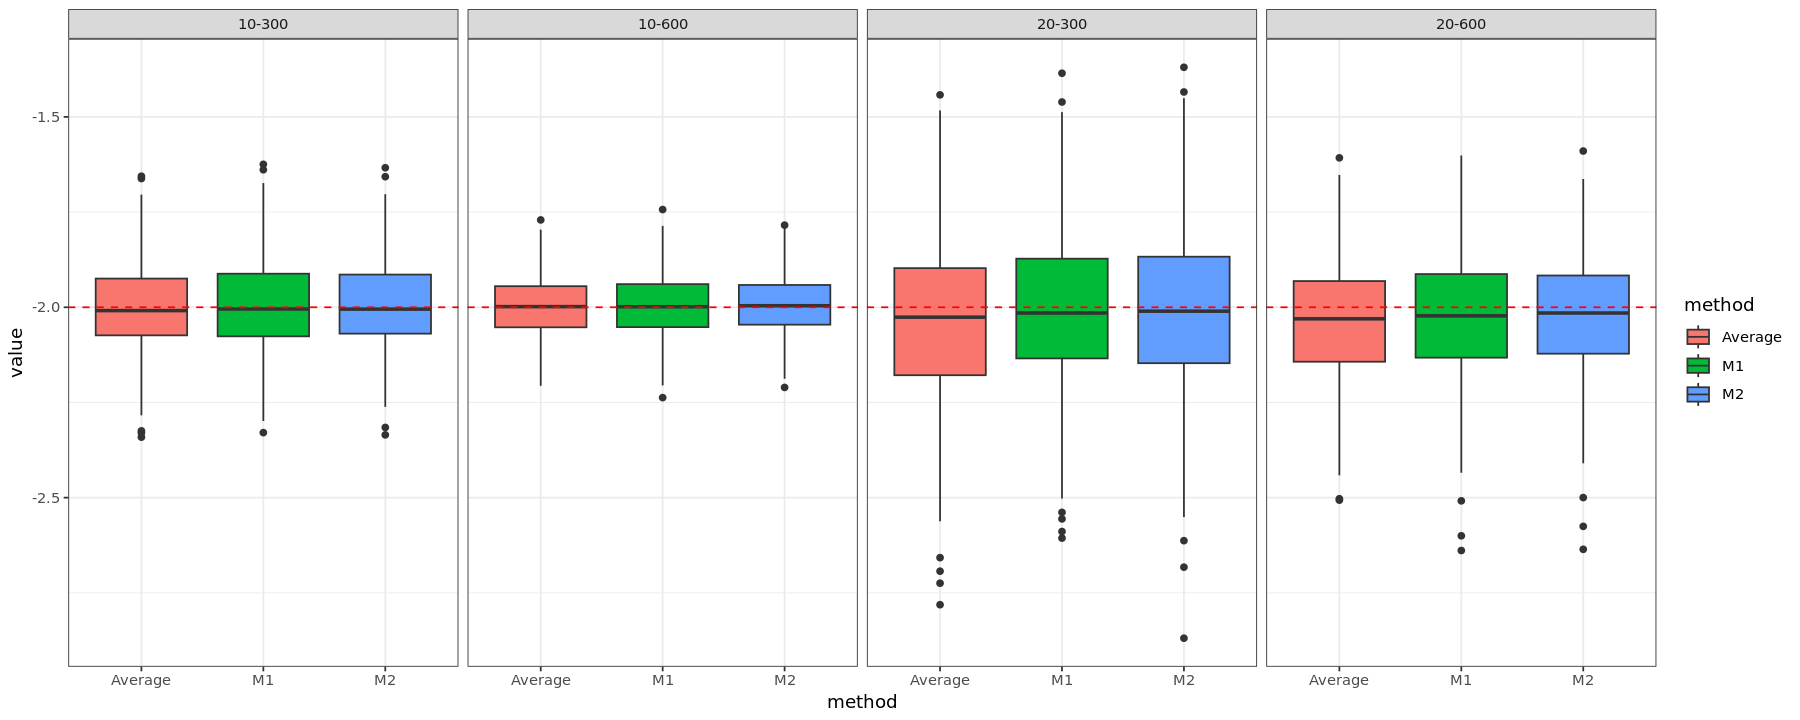

In [3]:
vec_file <- list.files(path = "output")

tib_out <- tibble()

for (
    path_cur in file.path(
        "output", 
        vec_file[str_detect(vec_file, "out_sim2m_t7_beta2.0_ip\\d+.csv")] 
    )
) {
    tib_out <- bind_rows(
        tib_out, 
        read_csv(file = path_cur, show_col_types = FALSE) %>% 
            mutate(
                d = str_extract(path_cur, "(?<=_ip)\\d+") %>% as.numeric(), 
                n = 300
            )
    )
}

for (
    path_cur in file.path(
        "output", 
        vec_file[str_detect(vec_file, "out_sim2m_t7_n6h_beta2.0_ip\\d+.csv")] 
    )
) {
    tib_out <- bind_rows(
        tib_out, 
        read_csv(file = path_cur, show_col_types = FALSE) %>% 
            mutate(
                d = str_extract(path_cur, "(?<=_ip)\\d+") %>% as.numeric(), 
                n = 600
            )
    )
}


beta <- -2

tib_out <- tib_out %>% 
    filter_at(
        vars(Average:Mo2), 
        function(x) abs(x - beta) < 2 * abs(beta)
    ) %>% 
    group_by(rnd_np, d, n) %>%
    # slice_head(n = 1) %>%
    summarise_at(
        vars(Average:Mo2),
        median
        # mean
    ) %>% 
    mutate() 

options(repr.plot.width = 15, repr.plot.height = 6)

tib_out %>%
    pivot_longer(
        cols = Average:Mo2, 
        names_to = "method",
        values_to = "value"
    ) %>% # group_by(method) %>% summarise(value = mean(value))
    filter(method %in% c("Average", "M1", "M2")) %>% 
    filter(d %in% c(1, 2, 10, 20)) %>% 
    mutate(d = ifelse(d < 10, d * 10, d)) %>% 
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = value, fill = method)
    ) + 
    geom_hline(yintercept = beta, linetype = "dashed", color = "red") +
    facet_wrap(~ paste(d, n, sep = "-"), nrow = 1) +
    theme_bw() 



comparison: gam v.s half gam v.s. double gam

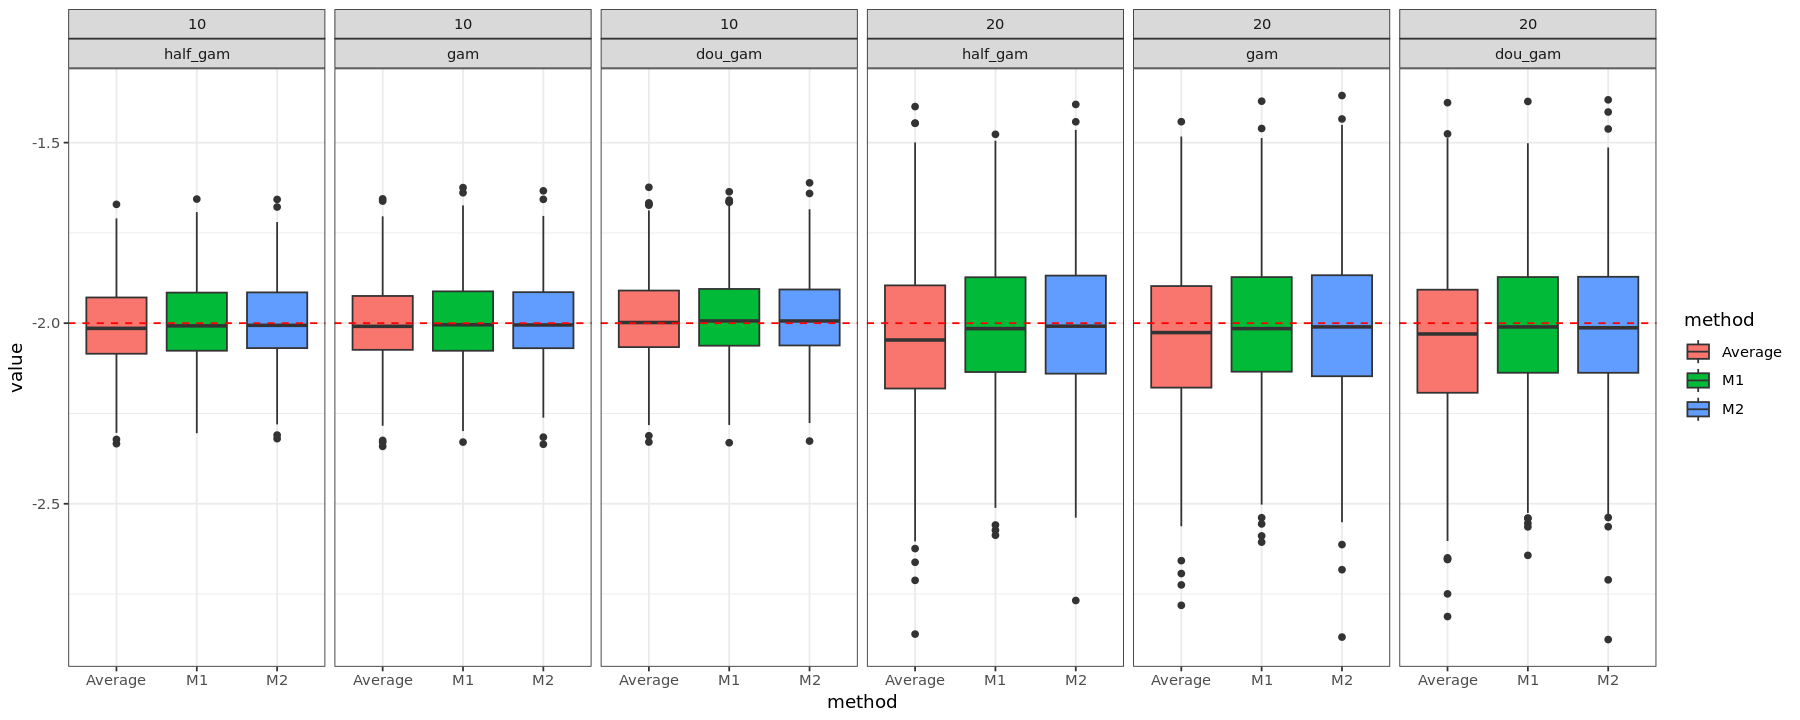

In [34]:
vec_file <- list.files(path = "output")

tib_out <- tibble()

for (
    path_cur in file.path(
        "output", 
        vec_file[str_detect(vec_file, "out_sim2m_t7_beta2.0_ip\\d+.csv")] 
    )
) {
    tib_out <- bind_rows(
        tib_out, 
        read_csv(file = path_cur, show_col_types = FALSE) %>% 
            mutate(
                d = str_extract(path_cur, "(?<=_ip)\\d+") %>% as.numeric(), 
                tag = "gam"
            )
    )
}

for (
    path_cur in file.path(
        "output", 
        vec_file[str_detect(vec_file, "out_sim2m_t7_dgam_beta2.0_ip\\d+.csv")] 
    )
) {
    tib_out <- bind_rows(
        tib_out, 
        read_csv(file = path_cur, show_col_types = FALSE) %>% 
            mutate(
                d = str_extract(path_cur, "(?<=_ip)\\d+") %>% as.numeric(), 
                tag = "dou_gam"
            )
    )
}

for (
    path_cur in file.path(
        "output", 
        vec_file[str_detect(vec_file, "out_sim2m_t7_hgam_beta2.0_ip\\d+.csv")] 
    )
) {
    tib_out <- bind_rows(
        tib_out, 
        read_csv(file = path_cur, show_col_types = FALSE) %>% 
            mutate(
                d = str_extract(path_cur, "(?<=_ip)\\d+") %>% as.numeric(), 
                tag = "half_gam"
            )
    )
}

beta <- -2

tib_out <- tib_out %>% 
    filter_at(
        vars(Average:Mo2), 
        function(x) abs(x - beta) < 2 * abs(beta)
    ) %>% 
    group_by(rnd_np, d, tag) %>%
    # slice_head(n = 1) %>%
    summarise_at(
        vars(Average:Mo2),
        median
        # mean
    ) %>% 
    mutate() 

options(repr.plot.width = 15, repr.plot.height = 6)

tib_out %>%
    pivot_longer(
        cols = Average:Mo2, 
        names_to = "method",
        values_to = "value"
    ) %>% # group_by(method) %>% summarise(value = mean(value))
    mutate(
        tag = factor(tag, levels = c("half_gam", "gam", "dou_gam"))
    ) %>% 
    filter(method %in% c("Average", "M1", "M2")) %>% 
    filter(d %in% c(1, 2, 10, 20)) %>% 
    mutate(d = ifelse(d < 10, d * 10, d)) %>% 
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = value, fill = method)
    ) + 
    geom_hline(yintercept = beta, linetype = "dashed", color = "red") +
    facet_wrap(~ d + tag, nrow = 1) +
    theme_bw() 



adjustment: site-specific gam

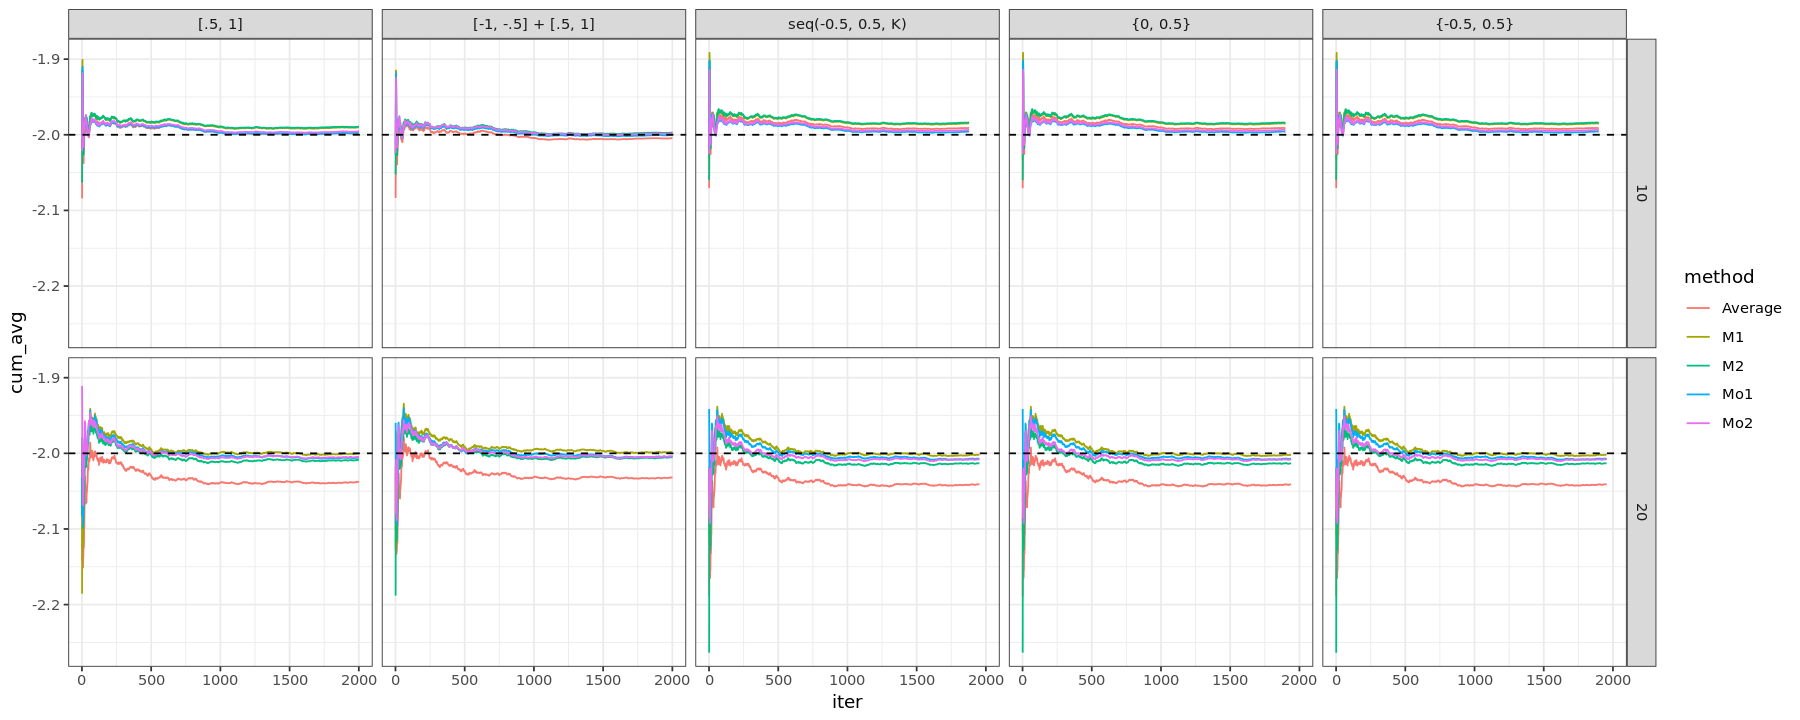

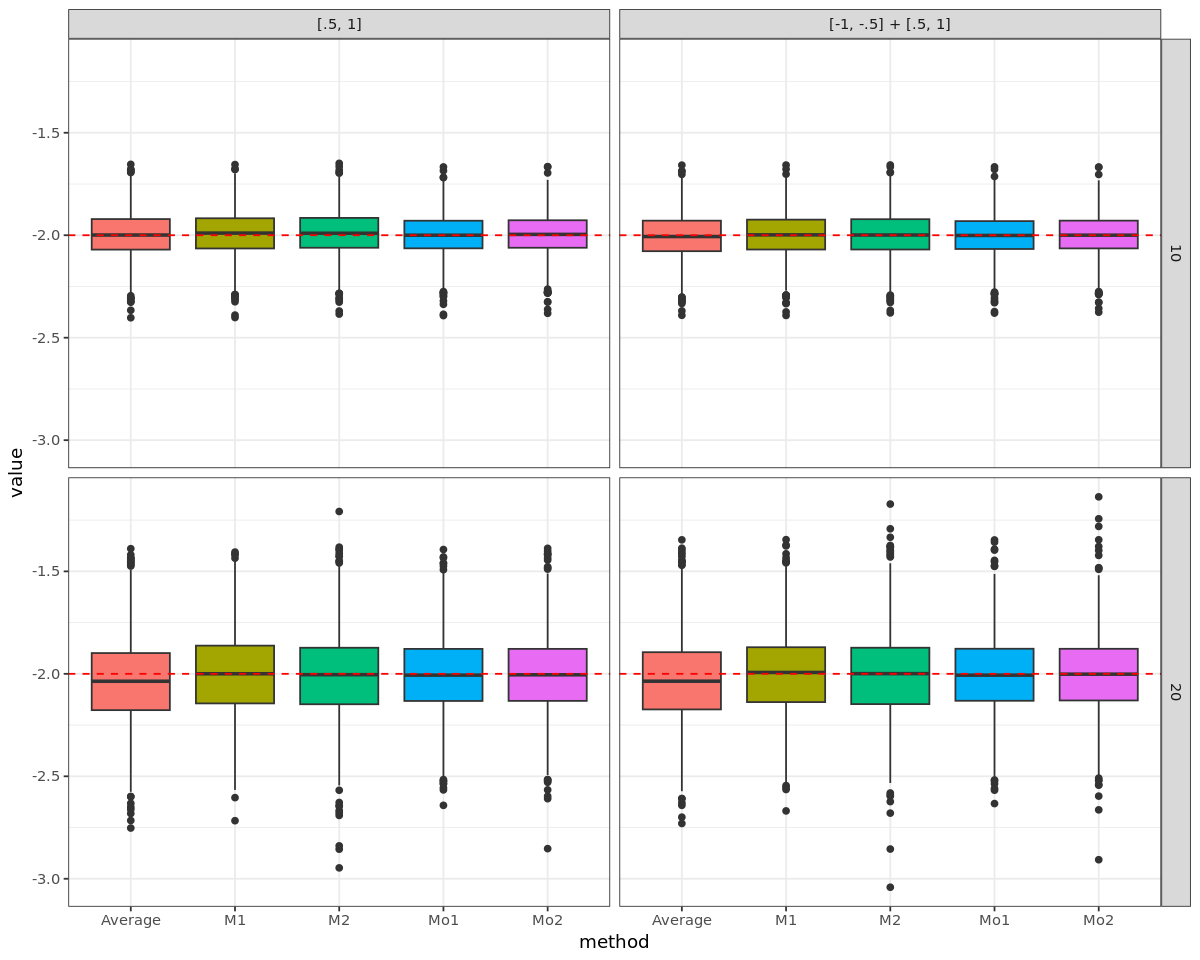

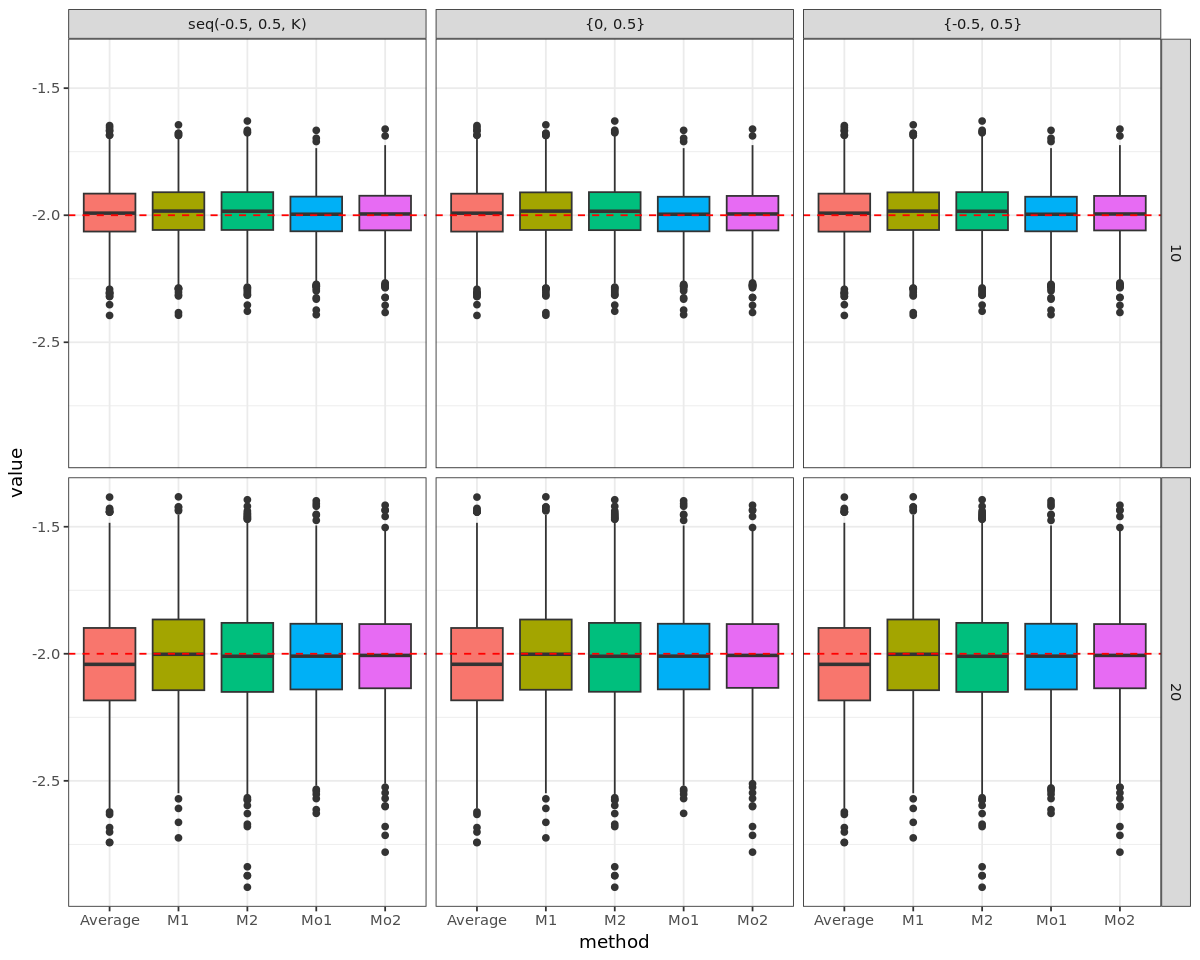

In [93]:
vec_file <- list.files(path = "output")

tib_out <- tibble()

for (
    path_cur in file.path(
        "output", 
        vec_file[str_detect(vec_file, "out_sim2m_t7_vgams\\d+_beta2.0_ip\\d+.csv")] 
    )
) {
    tib_out <- bind_rows(
        tib_out, 
        read_csv(file = path_cur, show_col_types = FALSE) %>% 
            mutate(
                d = str_extract(path_cur, "(?<=_ip)\\d+") %>% as.numeric(), 
                vgam = str_extract(path_cur, "(?<=_vgams)\\d+") %>% as.numeric(), 
            )
    )
}

beta <- -2

tib_out <- tib_out %>% 
    filter_at(
        vars(Average:Mo2), 
        function(x) abs(x - beta) < 2 * abs(beta)
    ) %>% 
    group_by(rnd_np, d, vgam) %>%
    # slice_head(n = 1) %>%
    slice_head(n = 5) %>%
    # slice_head(n = 10) %>%
    summarise_at(
        vars(Average:Mo2),
        # median
        mean
    ) %>% 
    mutate() 

lab_vgam <- c(
    "1" = "[1, 2]", 
    "2" = "[0, 1]", 
    "3" = "[-2, 2]", 
    "4" = "[-2, -1] + [1, 2]", 
    "5" = "[0, 0.5]",
    "6" = "[-0.5, 0.5]",
    "7" = "[.5, 1]", 
    "8" = "[-1, -.5] + [.5, 1]", 
    "9" = "seq(-0.5, 0.5, K)",
    "10" = "{0, 0.5}", 
    "11" = "{-0.5, 0.5}"
)

# options(repr.plot.width = 15, repr.plot.height = 8)

options(repr.plot.width = 15, repr.plot.height = 6)

tib_out %>% 
    pivot_longer(
        cols = Average:Mo2, 
        names_to = "method",
        values_to = "value"
    ) %>% 
    group_by(method, d, vgam) %>% 
    mutate(
        cum_avg = cumsum(value) / row_number()
    ) %>%
    mutate(iter = factor(rnd_np) %>% as.numeric()) %>%
    # filter(vgam %in% c(7, 8)) %>%
    filter(vgam > 6) %>%
    ggplot() +
    geom_line(
        mapping = aes(x = iter, y = cum_avg, color = method)
    ) +
    geom_hline(yintercept = beta, linetype = "dashed") +
    facet_grid(d ~ vgam, labeller = labeller(vgam = as_labeller(lab_vgam))) +
    theme_bw() 






options(repr.plot.width = 10, repr.plot.height = 8)

tib_out %>%
    pivot_longer(
        cols = Average:Mo2, 
        names_to = "method",
        values_to = "value"
    ) %>% # group_by(method) %>% summarise(value = mean(value))
    filter(vgam %in% c(7, 8)) %>%
    # filter(method %in% c("Average", "M1", "M2")) %>% 
    filter(d %in% c(1, 2, 10, 20)) %>% 
    mutate(d = ifelse(d < 10, d * 10, d)) %>% 
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = value, fill = method), 
        show.legend = FALSE
    ) + 
    geom_hline(yintercept = beta, linetype = "dashed", color = "red") +
    # facet_wrap(~ d + vgam, nrow = 1) +
    facet_grid(d ~ vgam, labeller = labeller(vgam = lab_vgam)) +
    theme_bw() 

tib_out %>%
    pivot_longer(
        cols = Average:Mo2, 
        names_to = "method",
        values_to = "value"
    ) %>% # group_by(method) %>% summarise(value = mean(value))
    filter(vgam > 8) %>%
    # filter(method %in% c("Average", "M1", "M2")) %>% 
    filter(d %in% c(1, 2, 10, 20)) %>% 
    mutate(d = ifelse(d < 10, d * 10, d)) %>% 
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = value, fill = method), 
        show.legend = FALSE
    ) + 
    geom_hline(yintercept = beta, linetype = "dashed", color = "red") +
    # facet_wrap(~ d + vgam, nrow = 1) +
    facet_grid(d ~ vgam, labeller = labeller(vgam = lab_vgam)) +
    theme_bw() 





gam - 0.5 gam - vargam7

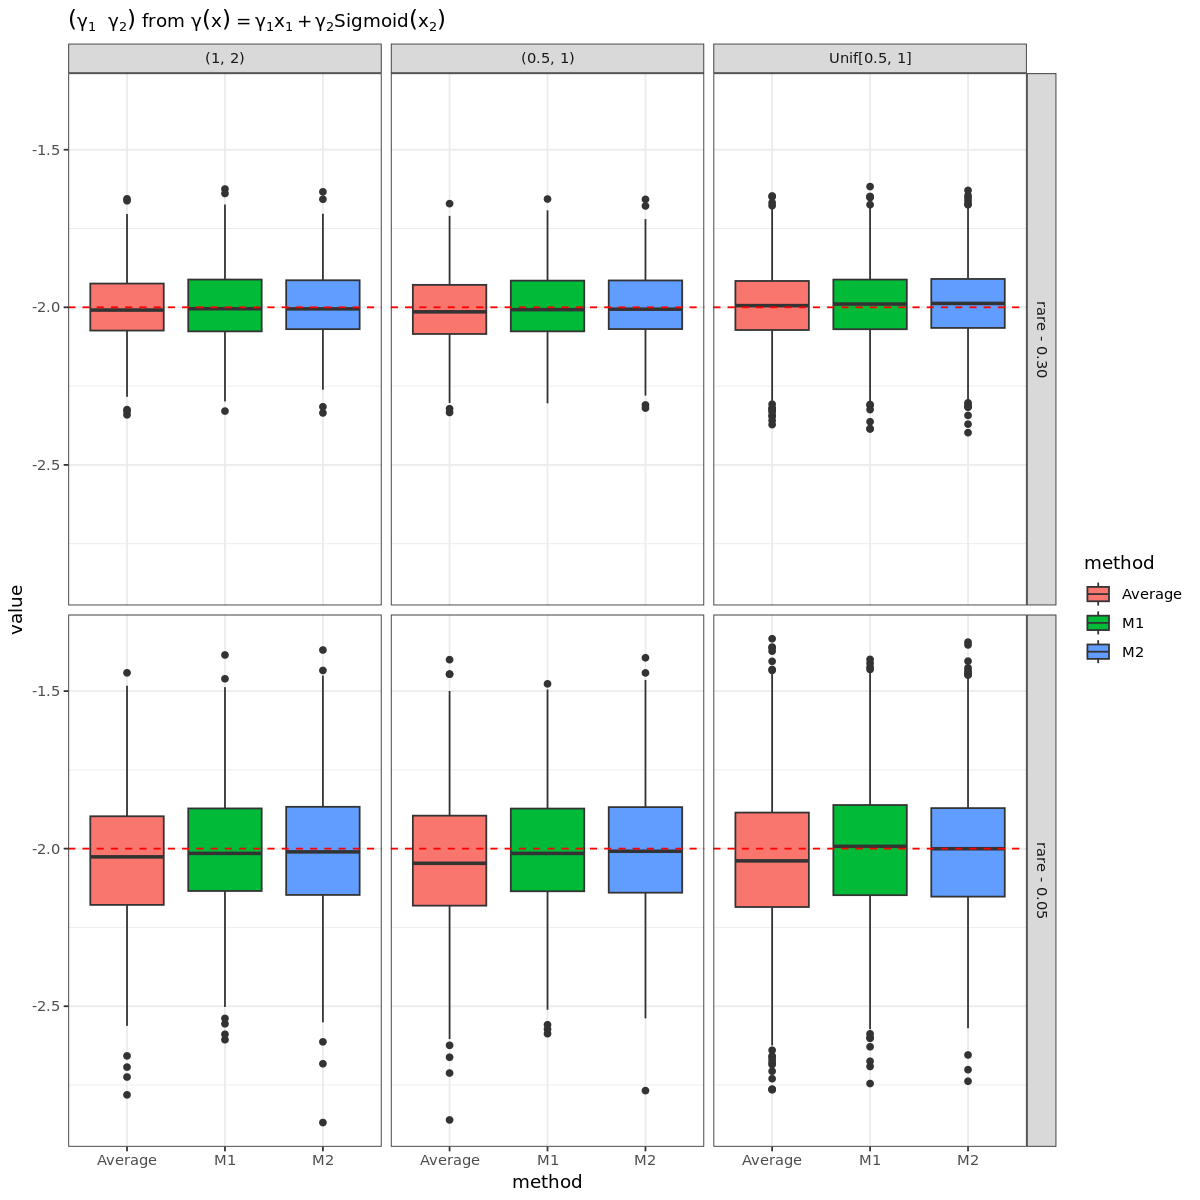

In [48]:
vec_file <- list.files(path = "output")

tib_out <- tibble()

for (
    path_cur in file.path(
        "output", 
        vec_file[str_detect(vec_file, "out_sim2m_t7_beta2.0_ip\\d+.csv")] 
    )
) {
    tib_out <- bind_rows(
        tib_out, 
        read_csv(file = path_cur, show_col_types = FALSE) %>% 
            mutate(
                d = str_extract(path_cur, "(?<=_ip)\\d+") %>% as.numeric(), 
                tag = "gam"
            )
    )
}

for (
    path_cur in file.path(
        "output", 
        vec_file[str_detect(vec_file, "out_sim2m_t7_hgam_beta2.0_ip\\d+.csv")] 
    )
) {
    tib_out <- bind_rows(
        tib_out, 
        read_csv(file = path_cur, show_col_types = FALSE) %>% 
            mutate(
                d = str_extract(path_cur, "(?<=_ip)\\d+") %>% as.numeric(), 
                tag = "half_gam"
            )
    )
}

for (
    path_cur in file.path(
        "output", 
        vec_file[str_detect(vec_file, "out_sim2m_t7_vgams7_beta2.0_ip\\d+.csv")] 
    )
) {
    tib_out <- bind_rows(
        tib_out, 
        read_csv(file = path_cur, show_col_types = FALSE) %>% 
            mutate(
                d = str_extract(path_cur, "(?<=_ip)\\d+") %>% as.numeric(), 
                tag = "vgam7"
            )
    )
}

beta <- -2

tib_out <- tib_out %>% 
    filter_at(
        vars(Average:Mo2), 
        function(x) abs(x - beta) < 2 * abs(beta)
    ) %>% 
    group_by(rnd_np, d, tag) %>%
    # slice_head(n = 1) %>%
    slice_head(n = 5) %>%
    summarise_at(
        vars(Average:Mo2),
        median
        # mean
    ) %>% 
    mutate() 

options(repr.plot.width = 10, repr.plot.height = 10)

lab_d <- c(
    "10" = "rare - 0.30",
    "20" = "rare - 0.05"
)

lab_tag <- c(
    "gam" = "(1, 2)", 
    "half_gam" = "(0.5, 1)", 
    "vgam7" = "Unif[0.5, 1]"
)

tib_out %>%
    pivot_longer(
        cols = Average:Mo2, 
        names_to = "method",
        values_to = "value"
    ) %>% # group_by(method) %>% summarise(value = mean(value))
    mutate(
        tag = factor(tag, levels = c("gam", "half_gam", "vgam7"))
    ) %>% 
    filter(method %in% c("Average", "M1", "M2")) %>% 
    filter(d %in% c(1, 2, 10, 20)) %>% 
    mutate(d = ifelse(d < 10, d * 10, d)) %>% 
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = value, fill = method)
    ) + 
    geom_hline(yintercept = beta, linetype = "dashed", color = "red") +
    # facet_wrap(~ d + tag, nrow = 1) +
    facet_grid(d ~ tag, labeller = labeller(d = lab_d, tag = lab_tag)) +
    labs(
        subtitle = expression((gamma[1] ~ ~ gamma[2]) ~ from ~ gamma(x) == gamma[1] * x[1] + gamma[2] * Sigmoid(x[2]))
    ) + 
    theme_bw() 

# ggsave(filename = "output/fig_sim2m_cpr.png", width = 10, height = 10)

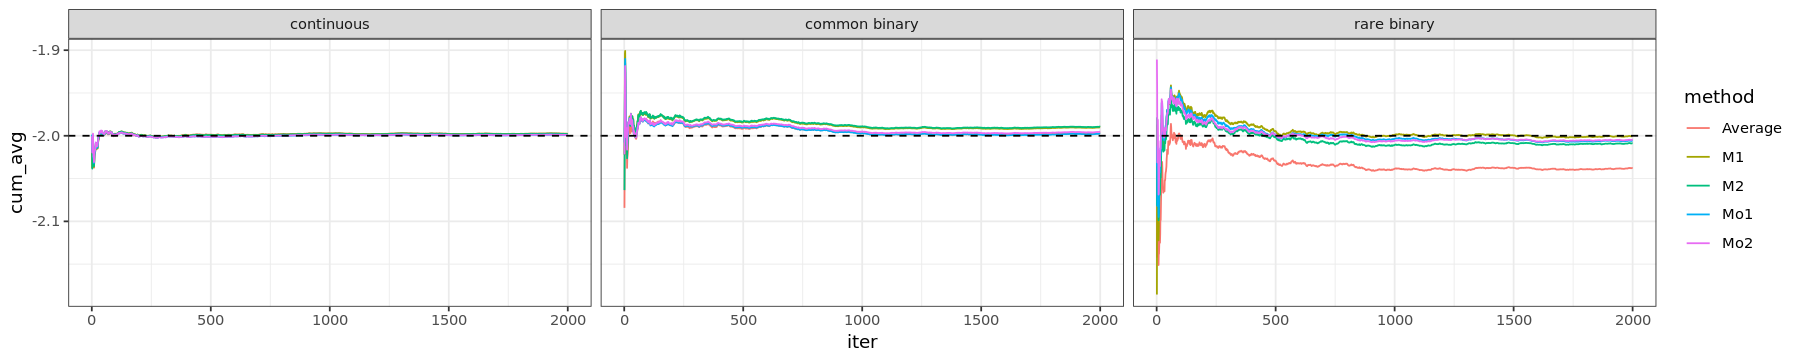

tag,Average,M1,M2
<chr>,<dbl>,<dbl>,<dbl>
binary_10,-1.998909,-1.989463,-1.990260
binary_20,-2.036287,-1.999699,-2.004217
cont,-1.998384,-1.999073,-1.999003


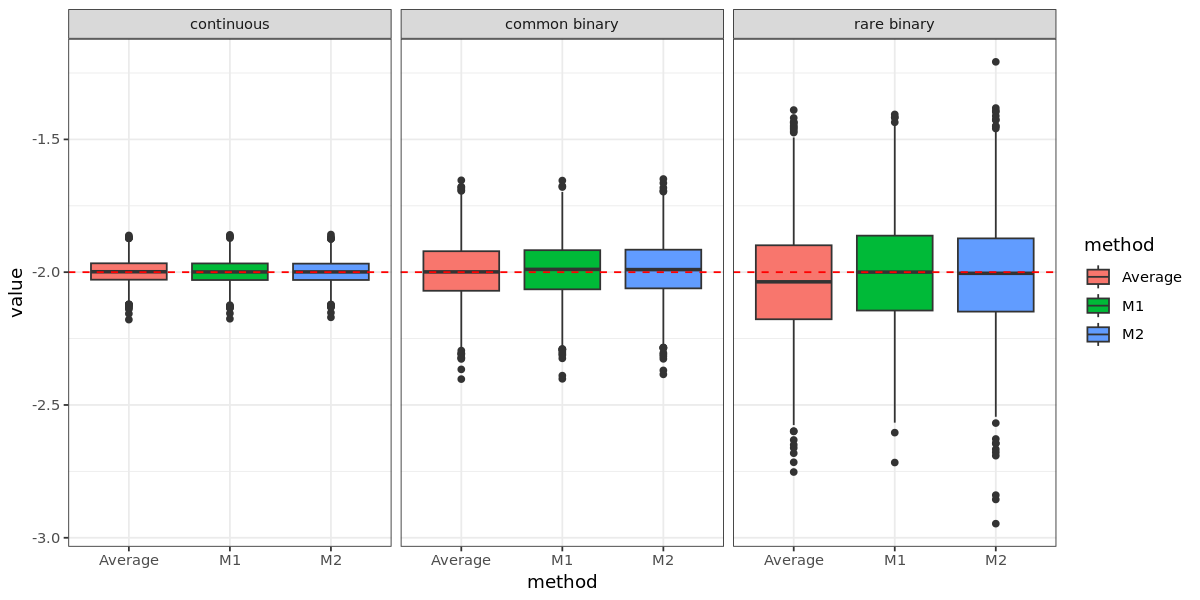

In [21]:
vec_file <- list.files(path = "output")

tib_out <- tibble()

for (
    path_cur in file.path(
        "output", 
        vec_file[str_detect(vec_file, "out_sim2m_t7_vgams7_beta2.0_ip\\d+.csv")] 
    )
) {
    tib_out <- bind_rows(
        tib_out, 
        read_csv(file = path_cur, show_col_types = FALSE) %>% 
            mutate(
                tag = paste0("binary_", str_extract(path_cur, "(?<=_ip)\\d+"))
            )
    )
}

for (
    path_cur in file.path(
        "output", 
        vec_file[str_detect(vec_file, "out_sim2mc_t7_vgams7_beta2.0_ip\\d+.csv")] 
    )
) {
    tib_out <- bind_rows(
        tib_out, 
        read_csv(file = path_cur, show_col_types = FALSE) %>% 
            mutate(
                tag = "cont"
            )
    )
}

beta <- -2

tib_out <- tib_out %>% 
    filter_at(
        vars(Average:Mo2), 
        function(x) abs(x - beta) < 2 * abs(beta)
    ) %>% 
    group_by(rnd_np, tag) %>%
    # slice_head(n = 1) %>%
    slice_head(n = 5) %>%
    summarise_at(
        vars(Average:Mo2),
        # median
        mean
    ) %>% 
    mutate() 

# tib_out

lab_tag <- c(
    "binary_10" = "common binary", 
    "binary_20" = "rare binary", 
    "cont" = "continuous"
)

options(repr.plot.width = 15, repr.plot.height = 3)

tib_out %>% 
    pivot_longer(
        cols = Average:Mo2, 
        names_to = "method",
        values_to = "value"
    ) %>% 
    group_by(method, tag) %>% 
    mutate(
        cum_avg = cumsum(value) / row_number()
    ) %>%
    mutate(iter = factor(rnd_np) %>% as.numeric()) %>%
    mutate(
        tag = factor(tag, levels = c("cont", "binary_10", "binary_20"))
    ) %>%
    ggplot() +
    geom_line(
        mapping = aes(x = iter, y = cum_avg, color = method)
    ) +
    geom_hline(yintercept = beta, linetype = "dashed") +
    facet_grid( ~ tag, labeller = labeller(tag = as_labeller(lab_tag))) +
    theme_bw() 

options(repr.plot.width = 10, repr.plot.height = 5)

tib_out %>%
    pivot_longer(
        cols = Average:Mo2, 
        names_to = "method",
        values_to = "value"
    ) %>% # group_by(method) %>% summarise(value = mean(value))
    mutate(
        tag = factor(tag, levels = c("cont", "binary_10", "binary_20"))
    ) %>% 
    filter(method %in% c("Average", "M1", "M2")) %>% 
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = value, fill = method)
    ) + 
    geom_hline(yintercept = beta, linetype = "dashed", color = "red") +
    facet_wrap(~ tag, labeller = labeller(tag = lab_tag)) +
    theme_bw()

tib_out %>% 
    group_by(tag) %>% 
    summarise_at(
        vars(Average:M2), 
        median
    )

# ggsave(filename = "output/fig_sim2mc_cpr.png", width = 10, height = 5)

In [22]:
head(tib_out)

tib_out_avg_m1_m2 <- tib_out

rnd_np,tag,Average,M1,M2,Mo1,Mo2
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
128,binary_10,-2.084237,-2.022050,-2.063478,-2.007820,-2.021776
128,binary_20,-2.142332,-2.185548,-2.081720,-2.035694,-1.910892
128,cont,-2.002895,-2.014548,-2.007756,-1.998654,-2.000488
129,binary_10,-1.963346,-1.936364,-1.944828,-1.954290,-1.957064
129,binary_20,-1.832923,-1.909998,-1.876708,-1.990004,-1.976376
129,cont,-2.071537,-2.059718,-2.069038,-2.038388,-2.038652


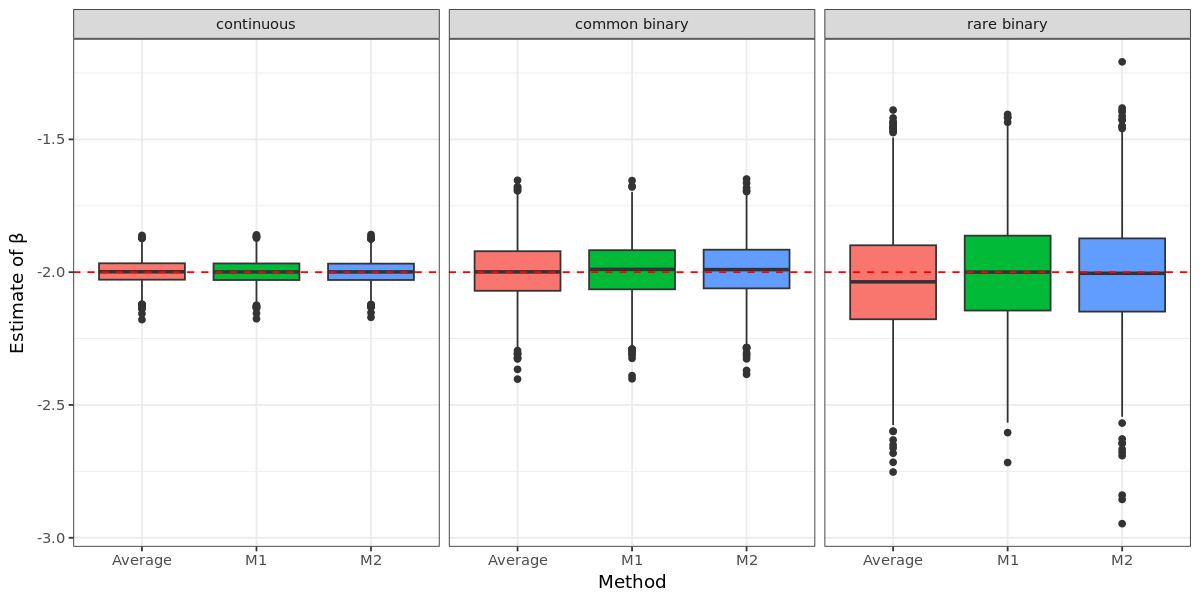

In [23]:
plt_sim2 <- tib_out %>%
    pivot_longer(
        cols = Average:Mo2, 
        names_to = "method",
        values_to = "value"
    ) %>% # group_by(method) %>% summarise(value = mean(value))
    mutate(
        tag = factor(tag, levels = c("cont", "binary_10", "binary_20"))
    ) %>% 
    filter(method %in% c("Average", "M1", "M2")) %>% 
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = value, fill = method), 
        show.legend = FALSE
    ) + 
    geom_hline(yintercept = beta, linetype = "dashed", color = "red") +
    facet_wrap(~ tag, labeller = labeller(tag = lab_tag)) +
    labs(
        x = "Method",
        y = expression("Estimate of" ~ beta),
    ) +
    theme_bw()

plt_sim2

ggsave(
    filename = "output/fig_sim2m_cpr.pdf", 
    plot = plt_sim2, 
    width = 10, 
    height = 5
)

## attempt 6: sim2m with covariate shift

code: `code/simulation/sim2mr_cs_vgam.py`

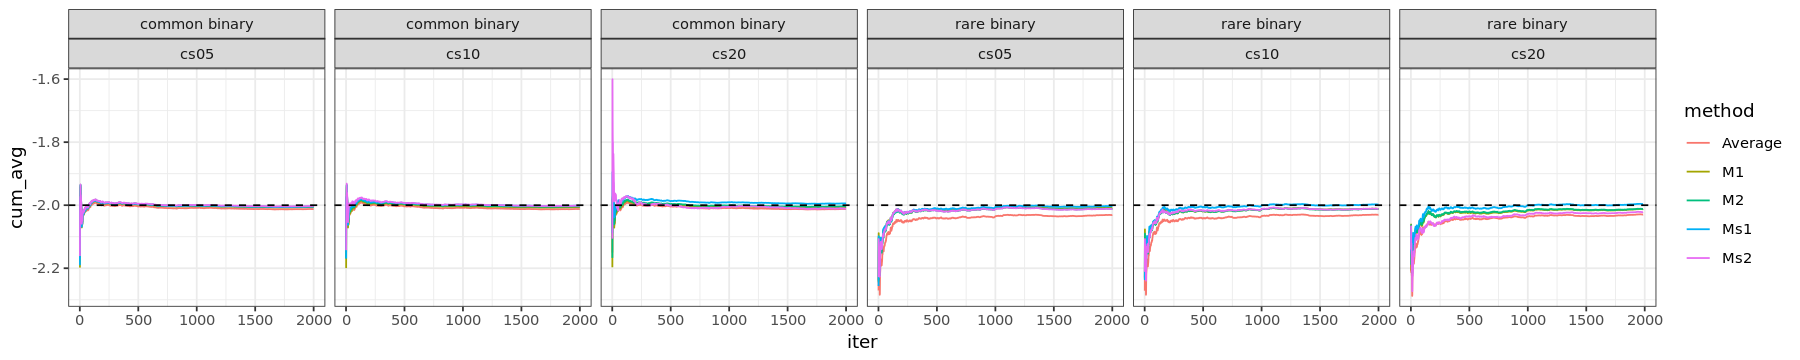

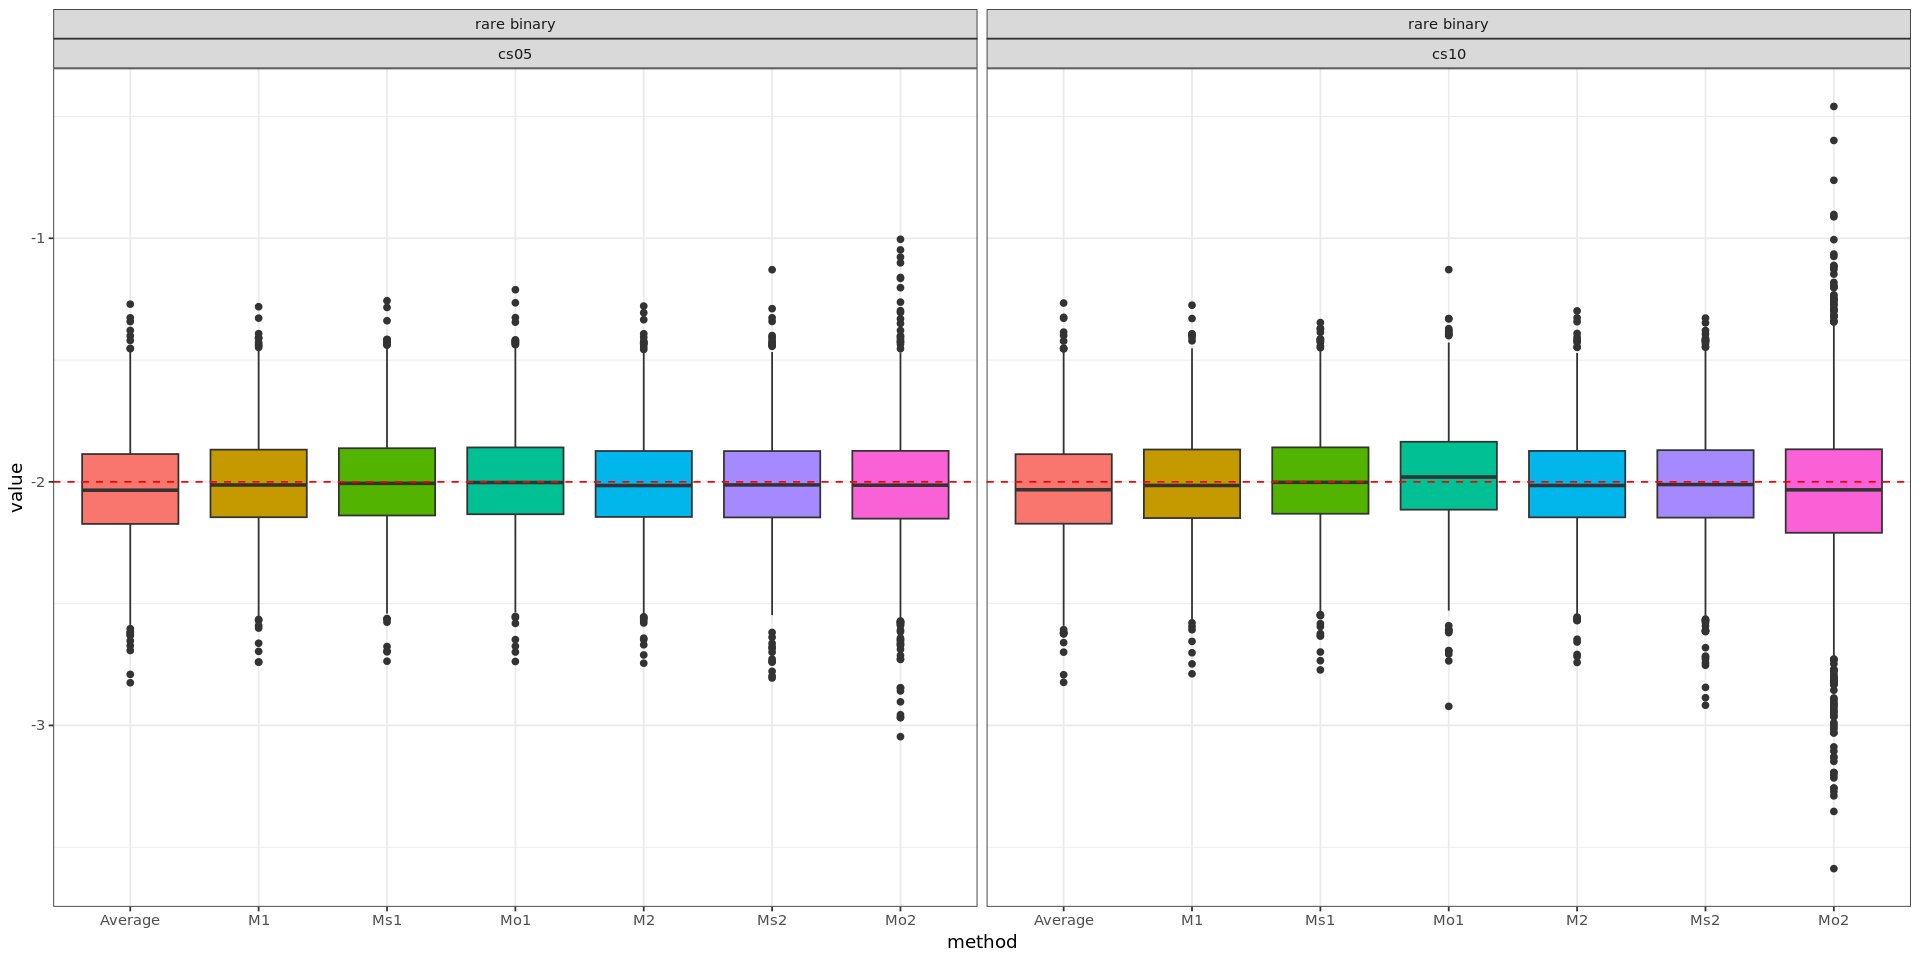

In [7]:
vec_file <- list.files(path = "output")

tib_out <- tibble()

for (
    path_cur in file.path(
        "output", 
        vec_file[str_detect(vec_file, "out_sim2mr_cs_new_ip\\d+_cs\\d+.csv")] 
    )
) {
    tib_out <- bind_rows(
        tib_out, 
        read_csv(file = path_cur, show_col_types = FALSE) %>% 
            mutate(
                rare = paste0("binary_", str_extract(path_cur, "(?<=_ip)\\d+")), 
                cs = paste0("cs_", str_extract(path_cur, "(?<=_cs)\\d+")), 
            )
    )
}

beta <- -2

tib_out <- tib_out %>% 
    filter_at(
        vars(Average:Mo2), 
        function(x) abs(x - beta) < 2 * abs(beta)
    ) %>% 
    group_by(rnd_np, rare, cs) %>%
    # slice_head(n = 1) %>%
    slice_head(n = 5) %>%
    summarise_at(
        vars(Average:Mo2),
        # median
        mean
    ) %>% 
    mutate() 

# tib_out

lab_rare <- c(
    "binary_1" = "common binary", 
    "binary_2" = "rare binary"
)

lab_cs <- c(
    "cs_1" = "cs05", 
    "cs_3" = "cs20",
    "cs_4" = "cs10"
)

options(repr.plot.width = 15, repr.plot.height = 3)

tib_out %>% 
    pivot_longer(
        # cols = c(Average, M1, Ms1, Mo1), 
        cols = c(Average, M1, Ms1, M2, Ms2), 
        names_to = "method",
        values_to = "value"
    ) %>%
    group_by(method, rare, cs) %>% 
    mutate(
        cum_avg = cumsum(value) / row_number()
    ) %>%
    mutate(iter = factor(rnd_np) %>% as.numeric()) %>%
    mutate(
        # tag = factor(tag, levels = c("cont", "binary_10", "binary_20"))
        rare = factor(rare, levels = c("binary_1", "binary_2")),
        cs = factor(cs, levels = c("cs_1", "cs_4", "cs_3"))
    ) %>%
    ggplot() +
    geom_line(
        mapping = aes(x = iter, y = cum_avg, color = method)
    ) +
    geom_hline(yintercept = beta, linetype = "dashed") +
    facet_grid(
        ~ rare + cs, 
        labeller = labeller(
            rare = as_labeller(lab_rare), 
            cs = as_labeller(lab_cs)
        )
    ) +
    theme_bw() 

options(repr.plot.width = 16, repr.plot.height = 8)

tib_out %>%
    filter(rare == "binary_2") %>%
    filter(cs != "cs_3") %>%
    pivot_longer(
        cols = c(
            Average, M1, Ms1, Mo1, M2, Ms2, Mo2
            # Average, M1, Ms1
            # Average, M1, Ms1, Mo1
            # Average, M1, Ms1, M2, Ms2
        ), 
        names_to = "method",
        values_to = "value"
    ) %>% # group_by(method) %>% summarise(value = mean(value))
    mutate(
        method = factor(
            method, 
            levels = c(
                "Average", "M1", "Ms1", "Mo1", "M2", "Ms2", "Mo2"
                # "Average", "M1", "Ms1"
                # "Average", "M1", "Ms1", "Mo1"
                # "Average", "M1", "Ms1", "M2", "Ms2"
            )
        ),
        # tag = factor(tag, levels = c("cont", "binary_10", "binary_20"))
        rare = factor(rare, levels = c("binary_1", "binary_2")),
        cs = factor(cs, levels = c("cs_1", "cs_4", "cs_3"))
    ) %>% 
    # filter(method %in% c("Average", "M1", "M2")) %>% 
    # filter(cs == "cs_1") %>%
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = value, fill = method), 
        show.legend = FALSE
    ) + 
    geom_hline(yintercept = beta, linetype = "dashed", color = "red") +
    facet_wrap(
        ~ rare + cs, 
        labeller = labeller(rare = lab_rare, cs = lab_cs), 
        nrow = 1
    ) +
    # ylim(c(-2.5, -1.5)) +
    theme_bw()

# ggsave(filename = "output/fig_sim2mr_cs_cpr.png", width = 8, height = 8)

# tib_out %>% 
#     group_by(rare, cs) %>% 
#     summarise_at(
#         vars(Average, M1, Ms1), 
#         c(median, sd)
#     )

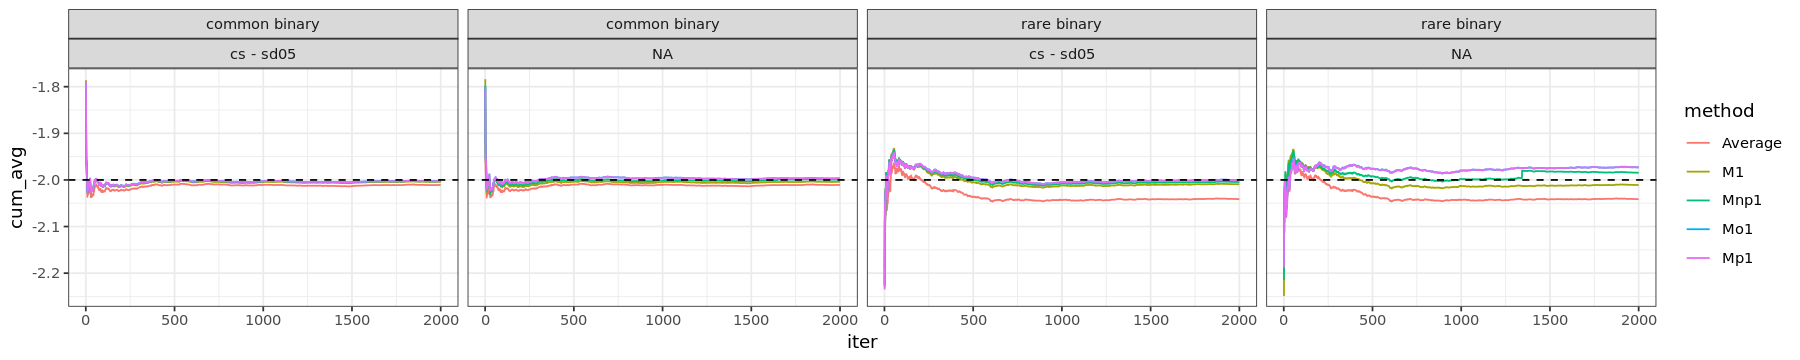

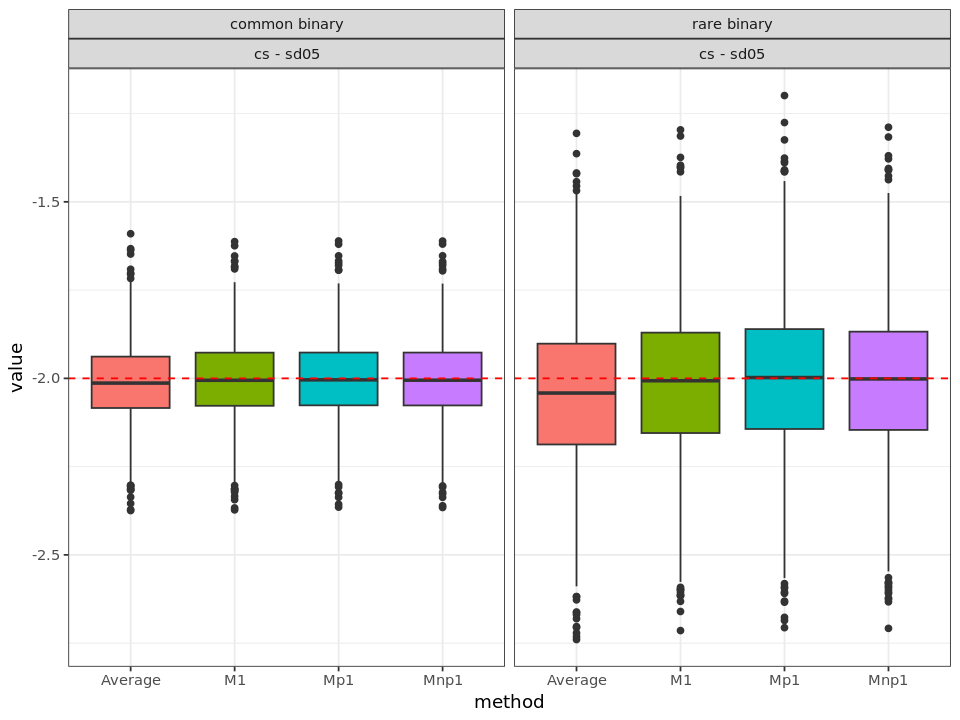

In [67]:
vec_file <- list.files(path = "output")

tib_out <- tibble()

for (
    path_cur in file.path(
        "output", 
        vec_file[str_detect(vec_file, "out_sim2mr_cspnp_ip\\d+_cs\\d+.csv")] 
    )
) {
    tib_out <- bind_rows(
        tib_out, 
        read_csv(file = path_cur, show_col_types = FALSE) %>% 
            mutate(
                rare = paste0("binary_", str_extract(path_cur, "(?<=_ip)\\d+")), 
                cs = paste0("cs_", str_extract(path_cur, "(?<=_cs)\\d+")), 
            )
    )
}

beta <- -2

tib_out <- tib_out %>% 
    # filter_at(
    #     vars(Average:Mo1), 
    #     function(x) abs(x - beta) < 2 * abs(beta)
    # ) %>% 
    group_by(rnd_np, rare, cs) %>%
    # slice_head(n = 1) %>%
    slice_head(n = 5) %>%
    summarise_at(
        vars(Average:Mo1),
        # median
        mean
    ) %>% 
    mutate() 

# tib_out

lab_rare <- c(
    "binary_1" = "common binary", 
    "binary_2" = "rare binary"
)

lab_cs <- c(
    "cs_1" = "cs - sd05", 
    "cs_4" = "cs - sd1"
)

options(repr.plot.width = 15, repr.plot.height = 3)

tib_out %>% 
    pivot_longer(
        cols = c(Average, M1, Mp1, Mnp1, Mo1), 
        names_to = "method",
        values_to = "value"
    ) %>%
    group_by(method, rare, cs) %>% 
    mutate(
        cum_avg = cumsum(value) / row_number()
    ) %>%
    mutate(iter = factor(rnd_np) %>% as.numeric()) %>%
    mutate(
        # tag = factor(tag, levels = c("cont", "binary_10", "binary_20"))
        rare = factor(rare, levels = c("binary_1", "binary_2")),
        cs = factor(cs, levels = c("cs_1", "cs_2"))
    ) %>%
    ggplot() +
    geom_line(
        mapping = aes(x = iter, y = cum_avg, color = method)
    ) +
    geom_hline(yintercept = beta, linetype = "dashed") +
    facet_grid(
        ~ rare + cs, 
        labeller = labeller(
            rare = as_labeller(lab_rare), 
            cs = as_labeller(lab_cs)
        )
    ) +
    theme_bw() 

options(repr.plot.width = 8, repr.plot.height = 6)

tib_out %>%
    filter(cs == "cs_1") %>%
    pivot_longer(
        cols = c(
            Average, M1, Mp1, Mnp1, Mo1
        ), 
        names_to = "method",
        values_to = "value"
    ) %>% # group_by(method) %>% summarise(value = mean(value))
    mutate(
        method = factor(
            method, 
            levels = c(
                "Average", "M1", "Mp1", "Mnp1", "Mo1"
            )
        ),
        # tag = factor(tag, levels = c("cont", "binary_10", "binary_20"))
        rare = factor(rare, levels = c("binary_1", "binary_2")),
        cs = factor(cs, levels = c("cs_1", "cs_4"))
    ) %>% 
    filter(method != "Mo1") %>%
    # filter(method %in% c("Average", "M1", "M2")) %>% 
    # filter(cs == "cs_1") %>%
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = value, fill = method), 
        show.legend = FALSE
    ) + 
    geom_hline(yintercept = beta, linetype = "dashed", color = "red") +
    facet_wrap(
        ~ rare + cs, 
        labeller = labeller(rare = lab_rare, cs = lab_cs), 
        nrow = 1
    ) +
    # ylim(c(-2.5, -1.5)) +
    theme_bw()

# ggsave(filename = "output/fig_sim2mr_cs_pnp_cpr.png", width = 8, height = 6)

# tib_out %>% 
#     group_by(rare, cs) %>% 
#     summarise_at(
#         vars(Average, M1, Ms1), 
#         c(median, sd)
#     )


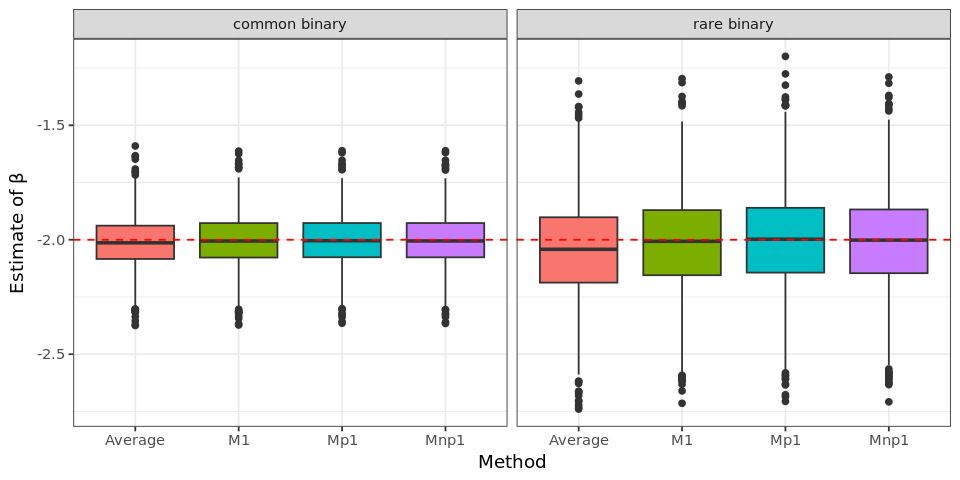

In [71]:
options(repr.plot.width = 8, repr.plot.height = 4)

plt_sim2_cs <- tib_out %>%
    filter(cs == "cs_1") %>%
    pivot_longer(
        cols = c(
            Average, M1, Mp1, Mnp1, Mo1
        ), 
        names_to = "method",
        values_to = "value"
    ) %>% # group_by(method) %>% summarise(value = mean(value))
    mutate(
        method = factor(
            method, 
            levels = c(
                "Average", "M1", "Mp1", "Mnp1", "Mo1"
            )
        ),
        # tag = factor(tag, levels = c("cont", "binary_10", "binary_20"))
        rare = factor(rare, levels = c("binary_1", "binary_2")),
        cs = factor(cs, levels = c("cs_1", "cs_4"))
    ) %>% 
    filter(method != "Mo1") %>%
    # filter(method %in% c("Average", "M1", "M2")) %>% 
    # filter(cs == "cs_1") %>%
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = value, fill = method), 
        show.legend = FALSE, 
        size = .5
    ) + 
    geom_hline(yintercept = beta, linetype = "dashed", color = "red") +
    facet_wrap(
        ~ rare, 
        labeller = labeller(rare = lab_rare, cs = lab_cs), 
        nrow = 1
    ) +
    labs(
        x = "Method",
        y = expression("Estimate of " * beta),
    ) + 
    theme_bw()

plt_sim2_cs

In [65]:
## save plt_sim2_cs
ggsave(
    filename = "output/fig_sim2mr_cs_pnp_cpr.pdf", 
    plot = plt_sim2_cs, 
    width = 10, 
    height = 5
)

## attempt 6: compare with single central site

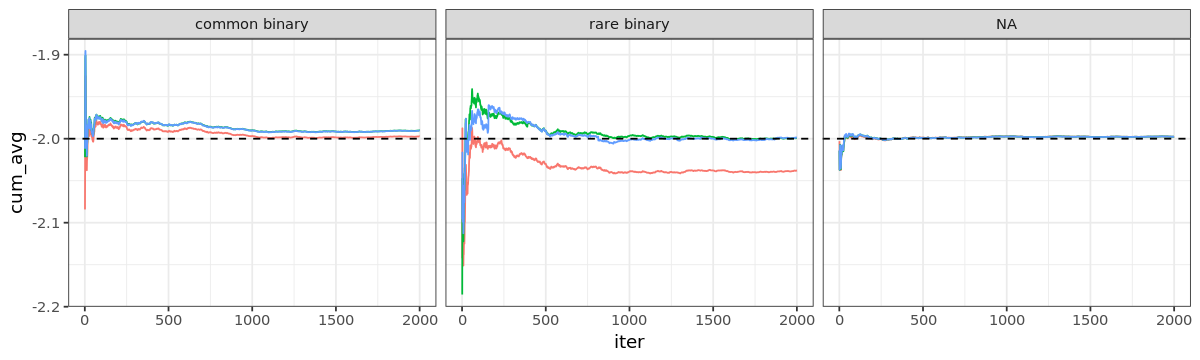

In [27]:
vec_file <- list.files(path = "output")

tib_out <- tibble()

for (
    path_cur in file.path(
        "output", 
        vec_file[str_detect(vec_file, "out_sim2mr_single_ip\\d+.csv")] 
    )
) {
    tib_out <- bind_rows(
        tib_out, 
        read_csv(file = path_cur, show_col_types = FALSE) %>% 
            mutate(
                rare = paste0("binary_", str_extract(path_cur, "(?<=_ip)\\d+")), 
            )
    )
}

for (
    path_cur in file.path(
        "output", 
        vec_file[str_detect(vec_file, "out_sim2mc_single_t7_vgams7_beta2.0_ip20.csv")] 
    )
) {
    tib_out <- bind_rows(
        tib_out, 
        read_csv(file = path_cur, show_col_types = FALSE) %>% 
            mutate(
                rare = paste0("cont"), 
            )
    )
}

beta <- -2

tib_out <- tib_out %>% 
    # filter_at(
    #     vars(Average:Mo1), 
    #     function(x) abs(x - beta) < 2 * abs(beta)
    # ) %>% 
    group_by(rnd_np, rare) %>%
    # slice_head(n = 1) %>%
    slice_head(n = 5) %>%
    summarise_at(
        vars(Average:Mc1),
        # median
        mean
    ) %>% 
    mutate() 

lab_rare <- c(
    "cont" = "continuous",
    "binary_10" = "common binary", 
    "binary_20" = "rare binary"
)

options(repr.plot.width = 10, repr.plot.height = 3)

tib_out %>% 
    pivot_longer(
        cols = c(Average, M1, Mc1), 
        names_to = "method",
        values_to = "value"
    ) %>%
    group_by(method, rare) %>% 
    mutate(
        cum_avg = cumsum(value) / row_number()
    ) %>%
    mutate(iter = factor(rnd_np) %>% as.numeric()) %>%
    mutate(
        rare = factor(rare, levels = c("binary_10", "binary_20")),
    ) %>%
    ggplot() +
    geom_line(
        mapping = aes(x = iter, y = cum_avg, color = method), 
        show.legend = FALSE
    ) +
    geom_hline(yintercept = beta, linetype = "dashed") +
    facet_grid(
        ~ rare, 
        labeller = labeller(
            rare = as_labeller(lab_rare), 
        )
    ) +
    theme_bw() 

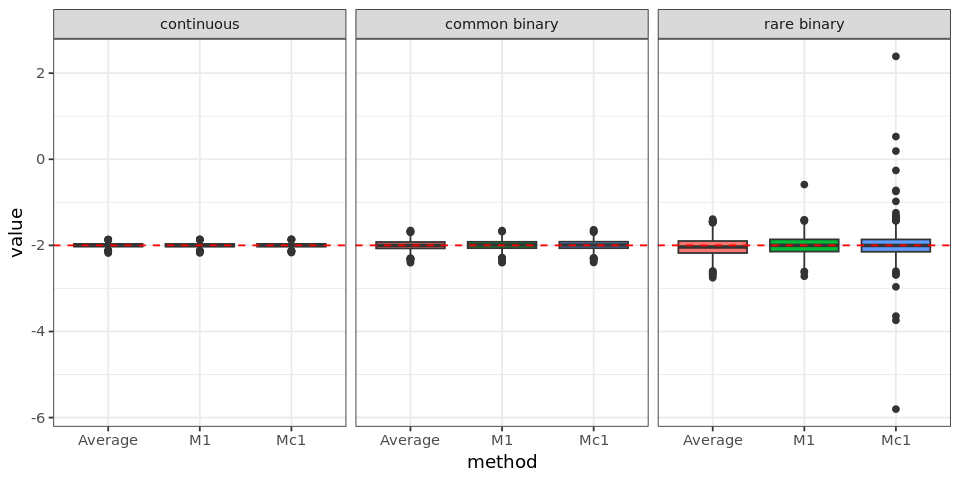

In [28]:

options(repr.plot.width = 8, repr.plot.height = 4)

tib_out %>%
    pivot_longer(
        cols = c(
            Average, M1, Mc1
        ), 
        names_to = "method",
        values_to = "value"
    ) %>% # group_by(method) %>% summarise(value = mean(value))
    mutate(
        method = factor(
            method, 
            levels = c(
                "Average", "M1", "Mc1"
            )
        ),
        rare = factor(rare, levels = c("cont", "binary_10", "binary_20"))
        # rare = factor(rare, levels = c("binary_10", "binary_20")),
    ) %>% 
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = value, fill = method), 
        show.legend = FALSE
    ) + 
    geom_hline(yintercept = beta, linetype = "dashed", color = "red") +
    facet_wrap(
        ~ rare, 
        labeller = labeller(rare = lab_rare), 
        nrow = 1
    ) +
    # ylim(c(-2.5, -1.5)) +
    theme_bw()

# ggsave(filename = "output/fig_sim2mr_single_cpr.png", width = 8, height = 4)

# tib_out %>% 
#     group_by(rare, cs) %>% 
#     summarise_at(
#         vars(Average, M1, Ms1), 
#         c(median, sd)
#     )

In [29]:
head(tib_out)

tib_out_m1_mc1 <- tib_out

rnd_np,rare,Average,M1,Mc1
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
128,binary_10,-2.084237,-2.022050,-2.011976
128,binary_20,-2.142332,-2.185548,-2.095894
128,cont,-2.002895,-2.014548,-2.013374
129,binary_10,-1.963346,-1.936364,-1.938682
129,binary_20,-1.832923,-1.909998,-1.937000
129,cont,-2.071537,-2.059718,-2.060396


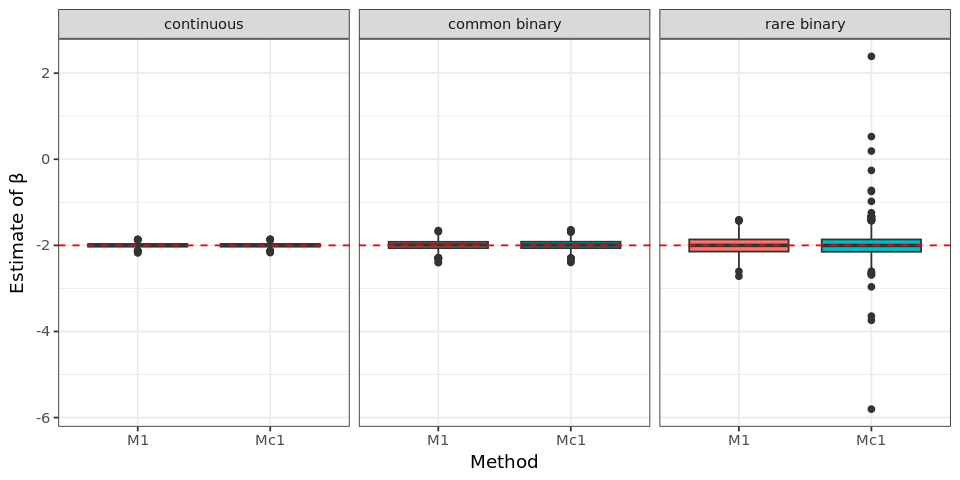

In [30]:
lab_tag <- c(
    "binary_10" = "common binary", 
    "binary_20" = "rare binary", 
    "cont" = "continuous"
)


plt_sim2p <- tib_out_avg_m1_m2 %>%
    left_join(
        tib_out_m1_mc1 %>% 
            select(rnd_np, rare, Mc1), 
        by = c("rnd_np", "tag" = "rare")
    ) %>% 
    select(rnd_np, tag, Average, M1, Mc1, M2) %>% 
    pivot_longer(
        cols = Average:M2, 
        names_to = "method",
        values_to = "value"
    ) %>% 
    drop_na() %>% # head(n = 20)
    mutate(
        tag = factor(tag, levels = c("cont", "binary_10", "binary_20"))
    ) %>% 
    filter(method %in% c("Average", "M1", "Mc1", "M2")) %>% 
    mutate(method = factor(method, levels = c("Average", "M1", "Mc1", "M2"))) %>%
    filter(method %in% c("M1", "Mc1")) %>% 
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = value, fill = method), 
        show.legend = FALSE
    ) + 
    geom_hline(yintercept = beta, linetype = "dashed", color = "red") +
    facet_wrap(~ tag, labeller = labeller(tag = lab_tag), scales = "free_x") +
    labs(
        x = "Method",
        y = expression("Estimate of" ~ beta),
    ) +
    # ylim(-4, 0) +
    theme_bw()

plt_sim2p

## attempt 6: compare with inverse-variance weighted

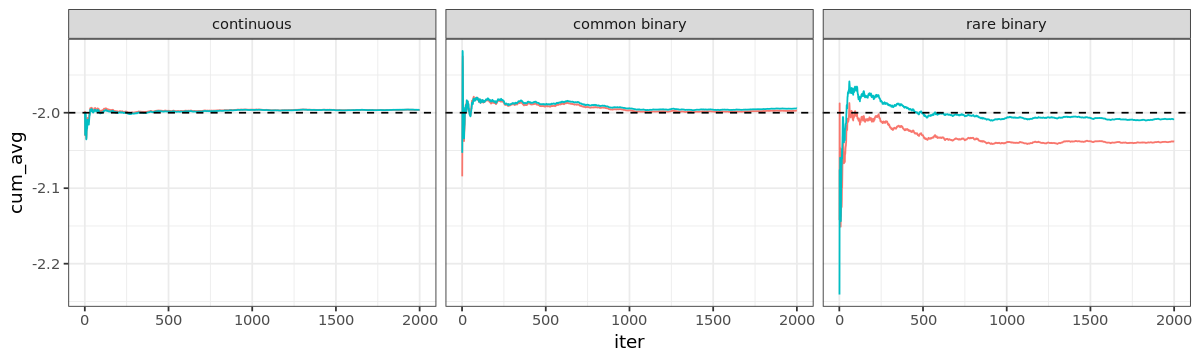

In [31]:
vec_file <- list.files(path = "output")

tib_out <- tibble()

for (
    path_cur in file.path(
        "output", 
        vec_file[str_detect(vec_file, "out_sim2mr_ivwa_ip\\d+.csv")] 
    )
) {
    tib_out <- bind_rows(
        tib_out, 
        read_csv(file = path_cur, show_col_types = FALSE) %>% 
            mutate(
                rare = paste0("binary_", str_extract(path_cur, "(?<=_ip)\\d+")), 
            )
    )
}

for (
    path_cur in file.path(
        "output", 
        vec_file[str_detect(vec_file, "out_sim2mc_ivwa.csv")] 
    )
) {
    tib_out <- bind_rows(
        tib_out, 
        read_csv(file = path_cur, show_col_types = FALSE) %>% 
            mutate(
                rare = "cont"
            )
    )
}

beta <- -2

tib_out <- tib_out %>% 
    # filter_at(
    #     vars(Average:Mo1), 
    #     function(x) abs(x - beta) < 2 * abs(beta)
    # ) %>% 
    group_by(rnd_np, rare) %>%
    # slice_head(n = 1) %>%
    slice_head(n = 5) %>%
    summarise_at(
        vars(Average:IVWAvg),
        # median
        mean
    ) %>% 
    mutate() 

tib_out_ivw <- tib_out

lab_rare <- c(
    "cont" = "continuous",
    "binary_10" = "common binary", 
    "binary_20" = "rare binary"
)

options(repr.plot.width = 10, repr.plot.height = 3)

tib_out %>% 
    pivot_longer(
        cols = c(Average, IVWAvg), 
        names_to = "method",
        values_to = "value"
    ) %>%
    group_by(method, rare) %>% 
    mutate(
        cum_avg = cumsum(value) / row_number()
    ) %>%
    mutate(iter = factor(rnd_np) %>% as.numeric()) %>%
    mutate(
        rare = factor(rare, levels = c("cont", "binary_10", "binary_20")),
    ) %>%
    ggplot() +
    geom_line(
        mapping = aes(x = iter, y = cum_avg, color = method), 
        show.legend = FALSE
    ) +
    geom_hline(yintercept = beta, linetype = "dashed") +
    facet_grid(
        ~ rare, 
        labeller = labeller(
            rare = as_labeller(lab_rare), 
        )
    ) +
    theme_bw() 

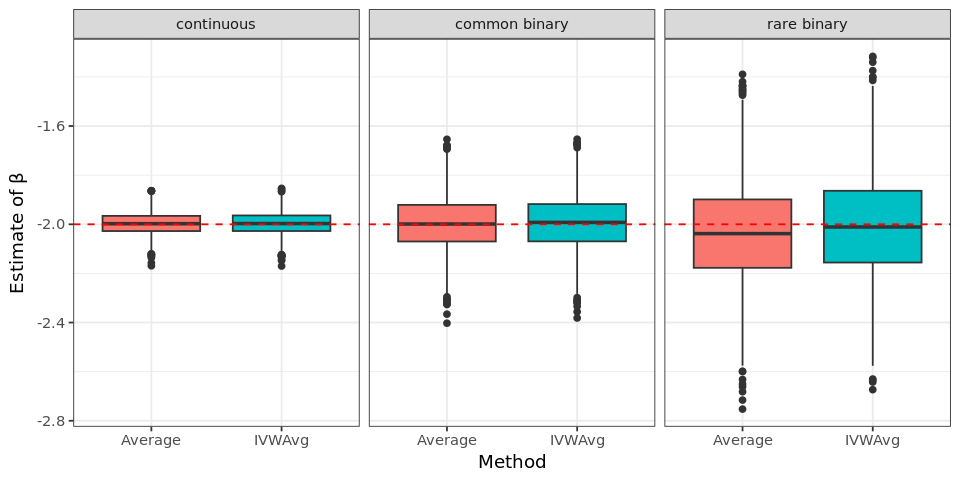

In [32]:
## inverse variance weighted average
options(repr.plot.width = 8, repr.plot.height = 4)

plt_sim2_ivw <- tib_out %>%
    pivot_longer(
        cols = c(
            Average, IVWAvg
        ), 
        names_to = "method",
        values_to = "value"
    ) %>% # group_by(method) %>% summarise(value = mean(value))
    mutate(
        method = factor(
            method, 
            levels = c(
                "Average", "IVWAvg"
            )
        ),
        rare = factor(rare, levels = c("cont", "binary_10", "binary_20"))
        # rare = factor(rare, levels = c("binary_10", "binary_20")),
    ) %>% 
    ggplot() + 
    geom_boxplot(
        mapping = aes(
            x = method, y = value, 
            fill = method
        ), 
        show.legend = FALSE
    ) + 
    geom_hline(yintercept = beta, linetype = "dashed", color = "red") +
    facet_wrap(
        ~ rare, 
        labeller = labeller(rare = lab_rare), 
        nrow = 1
    ) +
    theme_bw() + 
    labs(
        x = "Method",
        y = expression("Estimate of" ~ beta)
    )

plt_sim2_ivw
# ggsave(filename = "output/fig_sim2mr_single_cpr.png", width = 8, height = 4)

# tib_out %>% 
#     group_by(rare, cs) %>% 
#     summarise_at(
#         vars(Average, M1, Ms1), 
#         c(median, sd)
#     )

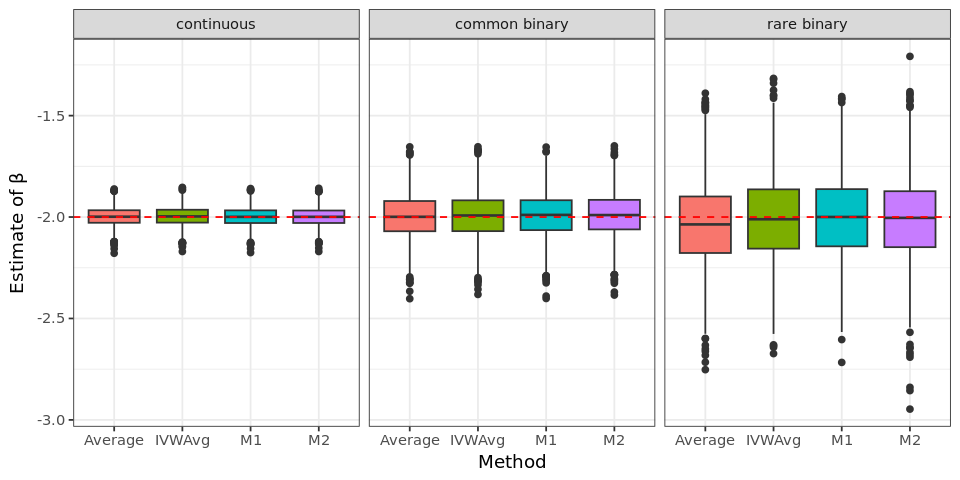

In [115]:
## combination - average, M1, M2, IVWAvg
options(repr.plot.width = 8, repr.plot.height = 4)

lab_tag <- c(
    "cont" = "continuous",
    "binary_10" = "common binary", 
    "binary_20" = "rare binary"
)

plt_sim2_ivw <- tib_out_avg_m1_m2 %>% 
    select(-starts_with("Mo")) %>%
    left_join(
        tib_out_ivw %>% 
            select(rnd_np, rare, IVWAvg), 
        by = c("rnd_np", "tag" = "rare")
    ) %>%
    pivot_longer(
        cols = Average:IVWAvg, 
        names_to = "method",
        values_to = "value"
    ) %>% 
    drop_na() %>%
    mutate(
        method = factor(
            method, 
            levels = c("Average", "IVWAvg", "M1", "M2")
        ), 
        tag = factor(tag, levels = c("cont", "binary_10", "binary_20"))
    ) %>% 
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = value, fill = method), 
        fatten = 1.5, 
        show.legend = FALSE
    ) + 
    geom_hline(yintercept = beta, linetype = "dashed", color = "red") +
    facet_wrap(~ tag, labeller = labeller(tag = lab_tag)) +
    labs(
        x = "Method",
        y = expression("Estimate of" ~ beta)
    ) + 
    theme_bw()

plt_sim2_ivw

# ggsave(
#     filename = "output/fig_sim2mr_ivw_cpr.pdf", 
#     width = 10, 
#     height = 5
# )

## sim2m with variant K and n

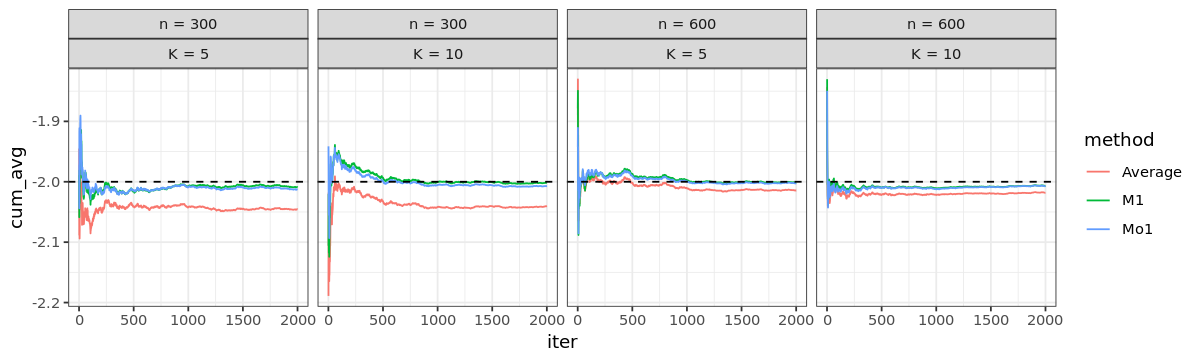

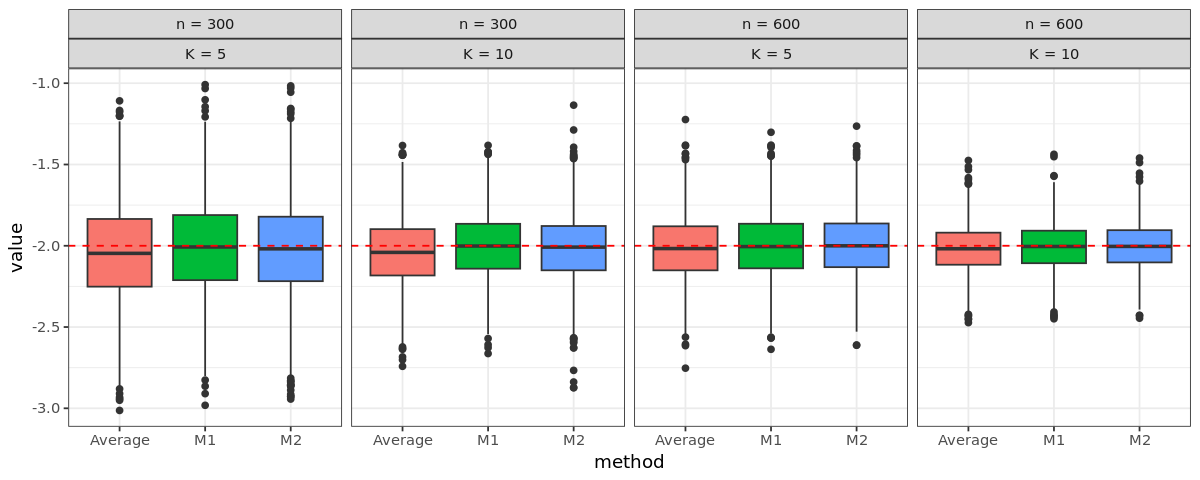

In [34]:
vec_file <- list.files(path = "output")

tib_out <- tibble()

for (
    path_cur in file.path(
        "output", 
        vec_file[str_detect(vec_file, "out_sim2mr_vkn_n\\d+_K\\d+.csv")] 
    )
) {
    tib_out <- bind_rows(
        tib_out, 
        read_csv(file = path_cur, show_col_types = FALSE) %>% 
            mutate(
                n = paste0("n_", str_extract(path_cur, "(?<=_n)\\d+")), 
                K = paste0("K_", str_extract(path_cur, "(?<=_K)\\d+")), 
            )
    )
}


beta <- -2

tib_out <- tib_out %>% 
    filter_at(
        vars(Average:Mo2), 
        function(x) abs(x - beta) < 2 * abs(beta)
    ) %>% 
    group_by(rnd_np, n, K) %>%
    # slice_head(n = 1) %>%
    slice_head(n = 5) %>%
    summarise_at(
        vars(Average:Mo2),
        # median
        mean
    ) %>% 
    mutate() 

# tib_out

lab_n <- c(
    "n_300" = "n = 300", 
    "n_600" = "n = 600"
)

lab_K <- c(
    "K_5" = "K = 5", 
    "K_10" = "K = 10"
)

options(repr.plot.width = 10, repr.plot.height = 3)

tib_out %>% 
    pivot_longer(
        cols = c(Average, M1, Mo1), 
        names_to = "method",
        values_to = "value"
    ) %>%
    group_by(method, n, K) %>% 
    mutate(
        cum_avg = cumsum(value) / row_number()
    ) %>%
    mutate(iter = factor(rnd_np) %>% as.numeric()) %>%
    mutate(
        n = factor(n, levels = c("n_300", "n_600")),
        K = factor(K, levels = c("K_5", "K_10"))
    ) %>% 
    ggplot() +
    geom_line(
        mapping = aes(x = iter, y = cum_avg, color = method)
    ) +
    geom_hline(yintercept = beta, linetype = "dashed") +
    facet_grid(
        ~ n + K, 
        labeller = labeller(
            n = as_labeller(lab_n), 
            K = as_labeller(lab_K)
        )
    ) +
    theme_bw() 


options(repr.plot.width = 10, repr.plot.height = 4)

tib_out %>%
    pivot_longer(
        cols = c(
            # Average, M1, Mo1
            # Average, M1, Ms1, Mo1
            # Average, M1, Ms1, M2, Ms2
            Average, M1, M2
        ), 
        names_to = "method",
        values_to = "value"
    ) %>% # group_by(method) %>% summarise(value = mean(value))
    mutate(
        method = factor(
            method, 
            levels = c(
                # "Average", "M1", "Mo1"
                # "Average", "M1", "Ms1", "Mo1"
                # "Average", "M1", "Ms1", "M2", "Ms2"
                "Average", "M1", "M2"
            )
        ),
        n = factor(n, levels = c("n_300", "n_600")), 
        K = factor(K, levels = c("K_5", "K_10"))
    ) %>% 
    # filter(method %in% c("Average", "M1", "M2")) %>% 
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = value, fill = method), 
        show.legend = FALSE
    ) + 
    geom_hline(yintercept = beta, linetype = "dashed", color = "red") +
    facet_wrap(
        ~ n + K, 
        labeller = labeller(n = lab_n, K = lab_K), 
        nrow = 1
    ) +
    # ylim(c(-2.5, -1.5)) +
    theme_bw()



## sim2m with unbalanced dataset

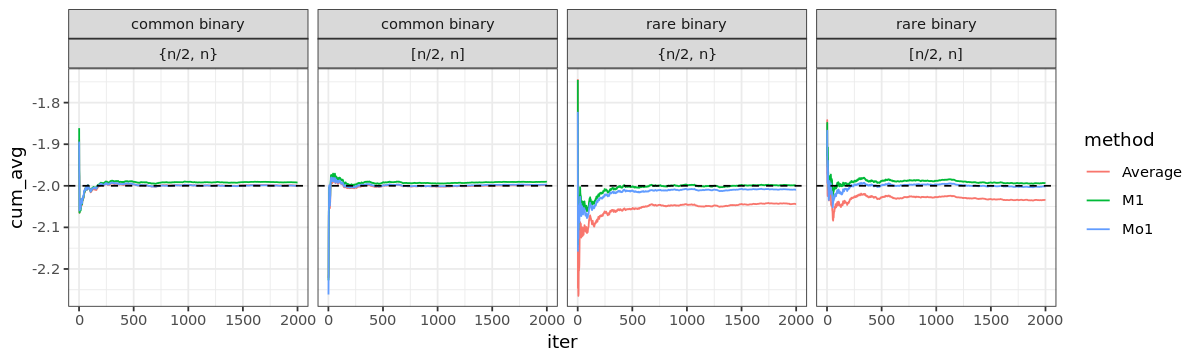

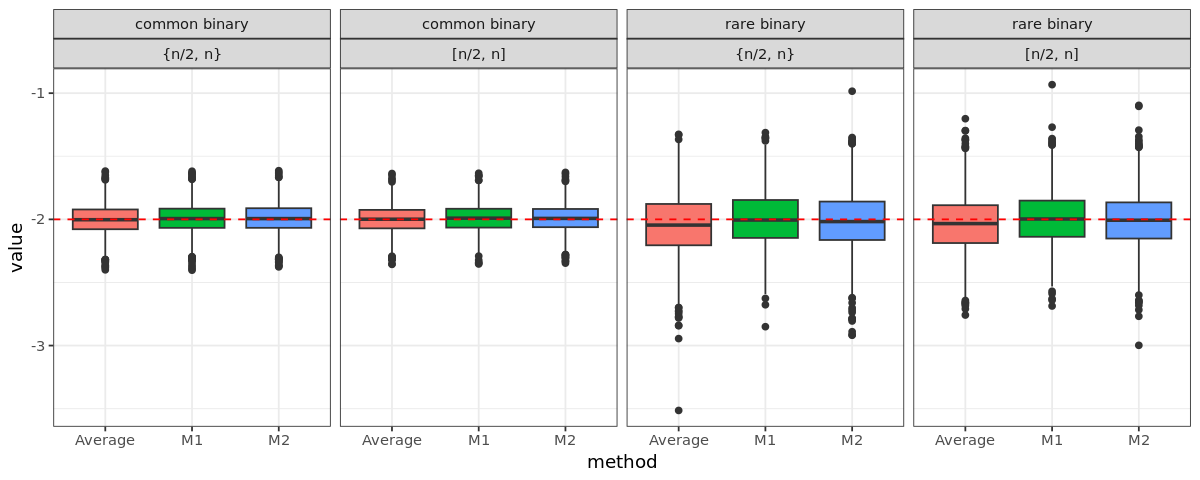

In [35]:
vec_file <- list.files(path = "output")

tib_out <- tibble()

for (
    path_cur in file.path(
        "output", 
        vec_file[str_detect(vec_file, "out_sim2mc_ub_t7_vgams7_vss\\d+_beta2.0_ip\\d+.csv")] 
    )
) {
    tib_out <- bind_rows(
        tib_out, 
        read_csv(file = path_cur, show_col_types = FALSE) %>% 
            mutate(
                rare = paste0("binary_", str_extract(path_cur, "(?<=_ip)\\d+")), 
                ub = paste0("vss_", str_extract(path_cur, "(?<=_vss)\\d+")), 
            )
    )
}


# tib_out %>% 
#     group_by(rare, ub) %>% 
#     summarise(n = n())

beta <- -2

tib_out <- tib_out %>% 
    filter_at(
        vars(Average:Mo2), 
        function(x) abs(x - beta) < 2 * abs(beta)
    ) %>% 
    group_by(rnd_np, rare, ub) %>%
    # slice_head(n = 1) %>%
    slice_head(n = 5) %>%
    summarise_at(
        vars(Average:Mo2),
        # median
        mean
    ) %>% 
    mutate() 

# tib_out

lab_rare <- c(
    "binary_10" = "common binary", 
    "binary_20" = "rare binary"
)

lab_ub <- c(
    "vss_1" = "{n/2, n}", 
    "vss_2" = "[n/2, n]"
)

options(repr.plot.width = 10, repr.plot.height = 3)

tib_out %>% 
    pivot_longer(
        cols = c(Average, M1, Mo1), 
        names_to = "method",
        values_to = "value"
    ) %>%
    group_by(method, rare, ub) %>% 
    mutate(
        cum_avg = cumsum(value) / row_number()
    ) %>%
    mutate(iter = factor(rnd_np) %>% as.numeric()) %>%
    mutate(
        rare = factor(rare, levels = c("binary_10", "binary_20")),
        ub = factor(ub, levels = c("vss_1", "vss_2"))
    ) %>% 
    ggplot() +
    geom_line(
        mapping = aes(x = iter, y = cum_avg, color = method)
    ) +
    geom_hline(yintercept = beta, linetype = "dashed") +
    facet_grid(
        ~ rare + ub, 
        labeller = labeller(
            rare = as_labeller(lab_rare), 
            ub = as_labeller(lab_ub)
        )
    ) +
    theme_bw() 


options(repr.plot.width = 10, repr.plot.height = 4)

tib_out %>%
    pivot_longer(
        cols = c(
            # Average, M1, Mo1
            # Average, M1, Ms1, Mo1
            # Average, M1, Ms1, M2, Ms2
            Average, M1, M2
        ), 
        names_to = "method",
        values_to = "value"
    ) %>% # group_by(method) %>% summarise(value = mean(value))
    mutate(
        method = factor(
            method, 
            levels = c(
                # "Average", "M1", "Mo1"
                # "Average", "M1", "Ms1", "Mo1"
                # "Average", "M1", "Ms1", "M2", "Ms2"
                "Average", "M1", "M2"
            )
        ),
        rare = factor(rare, levels = c("binary_10", "binary_20")), 
        ub = factor(ub, levels = c("vss_1", "vss_2"))
    ) %>% 
    # filter(method %in% c("Average", "M1", "M2")) %>% 
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = value, fill = method), 
        show.legend = FALSE
    ) + 
    geom_hline(yintercept = beta, linetype = "dashed", color = "red") +
    facet_wrap(
        ~ rare + ub, 
        labeller = labeller(rare = lab_rare, ub = lab_ub), 
        nrow = 1
    ) +
    # ylim(c(-2.5, -1.5)) +
    theme_bw()



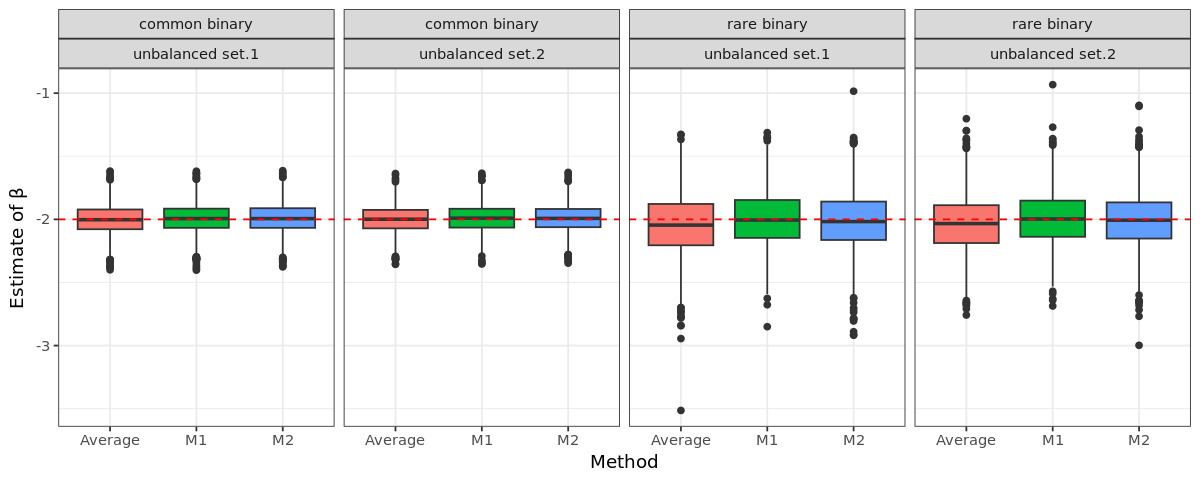

In [36]:
options(repr.plot.width = 10, repr.plot.height = 4)

lab_ub <- c(
    "vss_1" = "unbalanced set.1", 
    "vss_2" = "unbalanced set.2"
)

plt_sim2ub <- tib_out %>%
    pivot_longer(
        cols = c(
            # Average, M1, Mo1
            # Average, M1, Ms1, Mo1
            # Average, M1, Ms1, M2, Ms2
            Average, M1, M2
        ), 
        names_to = "method",
        values_to = "value"
    ) %>% # group_by(method) %>% summarise(value = mean(value))
    mutate(
        method = factor(
            method, 
            levels = c(
                # "Average", "M1", "Mo1"
                # "Average", "M1", "Ms1", "Mo1"
                # "Average", "M1", "Ms1", "M2", "Ms2"
                "Average", "M1", "M2"
            )
        ),
        rare = factor(rare, levels = c("binary_10", "binary_20")), 
        ub = factor(ub, levels = c("vss_1", "vss_2"))
    ) %>% 
    # filter(method %in% c("Average", "M1", "M2")) %>% 
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = value, fill = method), 
        show.legend = FALSE
    ) + 
    geom_hline(yintercept = beta, linetype = "dashed", color = "red") +
    facet_wrap(
        ~ rare + ub, 
        labeller = labeller(rare = lab_rare, ub = lab_ub), 
        nrow = 1
    ) +
    # ylim(c(-2.5, -1.5)) +
    theme_bw() + 
    labs(
        x = "Method",
        y = expression("Estimate of" ~ beta),
    )


plt_sim2ub

## Sim2m 5c

Warning message:
“Removed 49 rows containing non-finite values (`stat_boxplot()`).”


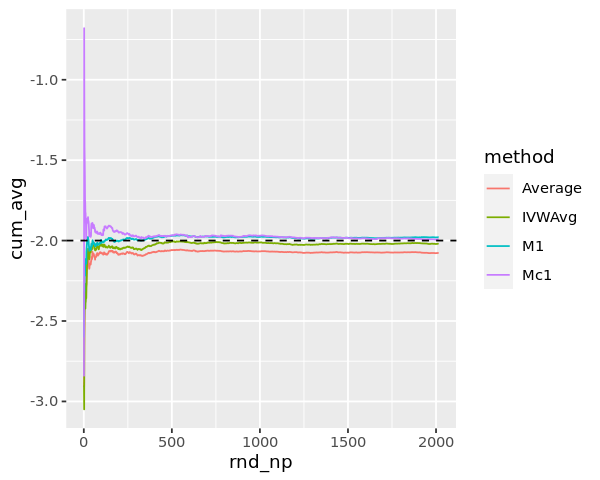

Warning message:
“Removed 49 rows containing non-finite values (`stat_boxplot()`).”


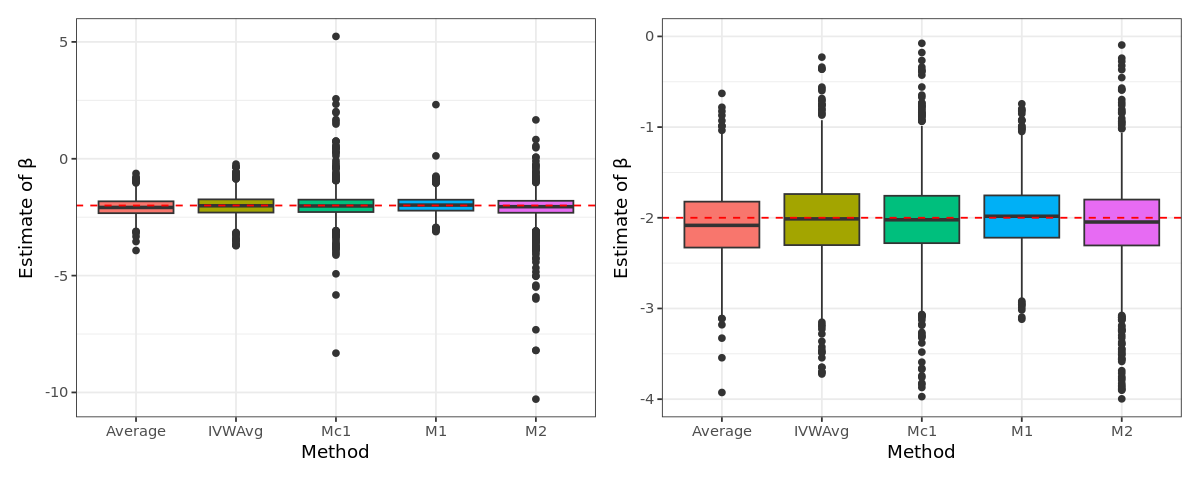

In [5]:
vec_file <- list.files(path = "output")

tib_out <- tibble()

for (
    path_cur in file.path(
        "output", 
        vec_file[str_detect(vec_file, "out_sim2mr_c5_ip\\d+.csv")] 
    )
) {
    tib_out <- bind_rows(
        tib_out, 
        read_csv(file = path_cur, show_col_types = FALSE) %>% 
            mutate(
                d = str_extract(path_cur, "(?<=_ip)\\d+") %>% as.numeric()
            )
    )
}

options(repr.plot.width = 5, repr.plot.height = 4)

beta_truth <- -2

# tib_out %>% tail() %>% print()

tib_out %>% 
    group_by(rnd_np, d) %>% 
    filter(n() >= 3) %>% 
    summarise_at(
        vars(Average:M2), 
        mean
    ) %>% 
    ungroup() %>% 
    mutate(
        rnd_np = factor(rnd_np) %>% as.numeric()
    ) %>% 
    pivot_longer(
        cols = Average:M1, 
        names_to = "method",
        values_to = "value"
    ) %>% 
    group_by(method) %>% 
    mutate(
        cum_avg = cumsum(value) / row_number()
    ) %>% 
    ggplot() + 
    geom_line(
        mapping = aes(x = rnd_np, y = cum_avg, color = method)
    ) +
    geom_hline(yintercept = beta_truth, linetype = "dashed")



plt_sim2m_5c <- tib_out %>% 
    group_by(rnd_np, d) %>%
    filter(n() >= 3) %>% 
    summarise_at(
        vars(Average:M2),
        mean
        # median
    ) %>%
    pivot_longer(
        cols = Average:M2, 
        names_to = "method",
        values_to = "value"
    ) %>% 
    filter(value > -20) %>%
    # filter(
    #     method != "M2"
    # ) %>% 
    mutate(
        method = factor(
            method, 
            levels = c("Average", "IVWAvg", "Mc1", "M1", "M2")
        )
    ) %>% 
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = value, fill = method), 
        show.legend = FALSE
    ) +
    geom_hline(yintercept = beta_truth, linetype = "dashed", color = "red") +
    # facet_wrap(~ d, nrow = 1) +
    labs(
        x = "Method",
        y = expression("Estimate of" ~ beta),
    ) +
    theme_bw()

options(repr.plot.width = 10, repr.plot.height = 4)

(
    plt_sim2m_5c
) + (
    plt_sim2m_5c + 
        ylim(-4, 0)
)

ggsave(
    filename = "output/fig_sim2mr_c5_cpr.pdf", 
    plot = last_plot(), 
    width = 10, 
    height = 4
)

## sim2m homo

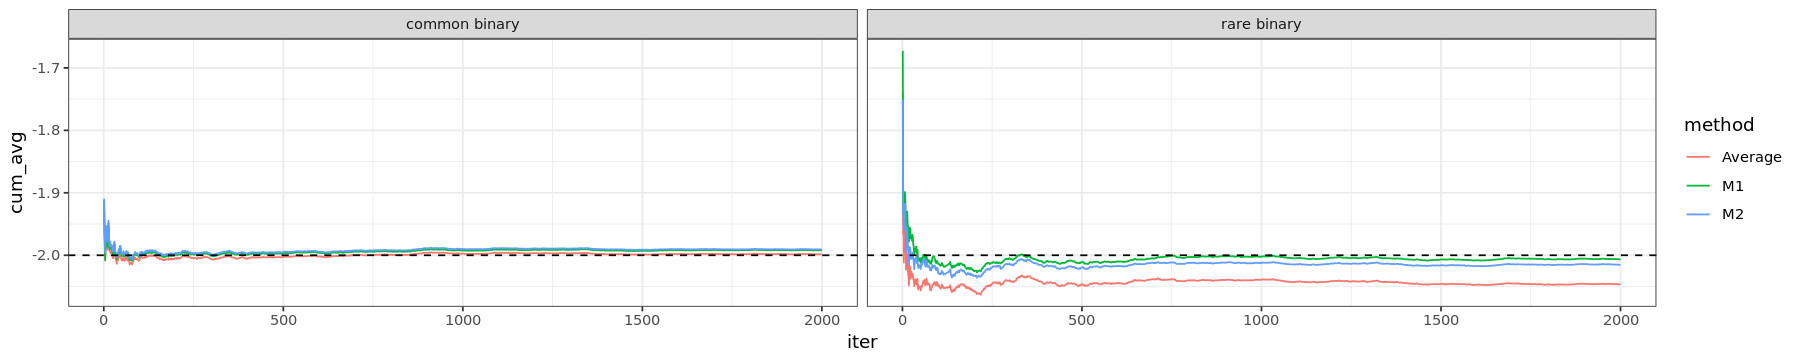

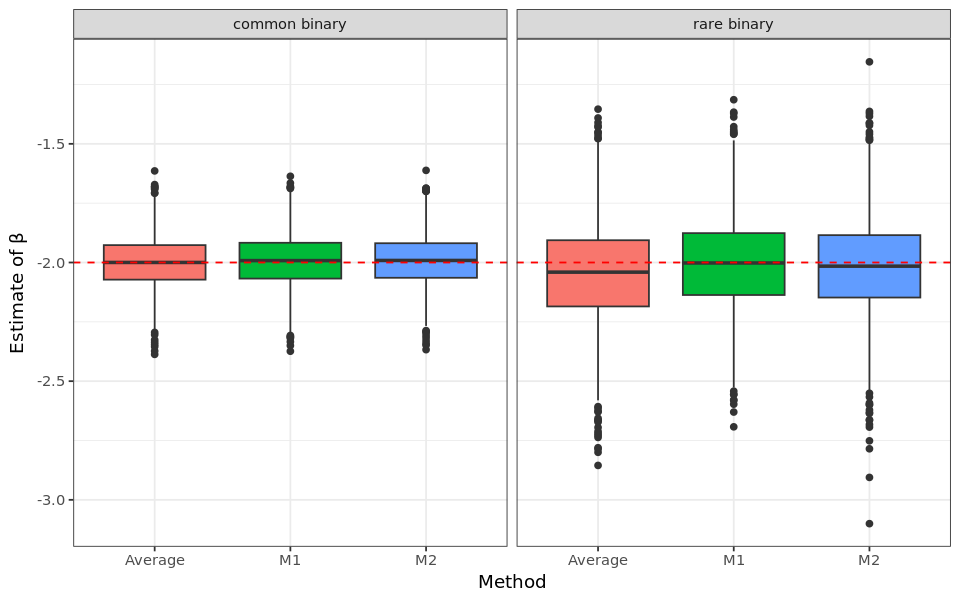

In [52]:
vec_file <- list.files(path = "output")

tib_out <- tibble()

for (
    path_cur in file.path(
        "output", 
        vec_file[str_detect(vec_file, "out_sim2mr_hom_ip\\d+.csv")] 
    )
) {
    tib_out <- bind_rows(
        tib_out, 
        read_csv(file = path_cur, show_col_types = FALSE) %>% 
            mutate(
                tag = paste0("binary_", str_extract(path_cur, "(?<=_ip)\\d+"))
            )
    )
}

beta <- -2

tib_out <- tib_out %>% 
    filter_at(
        vars(Average:M2), 
        function(x) abs(x - beta) < 2 * abs(beta)
    ) %>% 
    group_by(rnd_np, tag) %>%
    # slice_head(n = 1) %>%
    slice_head(n = 5) %>%
    summarise_at(
        vars(Average:M2),
        # median
        mean
    ) %>% 
    mutate() 

# tib_out

lab_tag <- c(
    "binary_10" = "common binary", 
    "binary_20" = "rare binary", 
    "cont" = "continuous"
)

options(repr.plot.width = 15, repr.plot.height = 3)

tib_out %>% 
    pivot_longer(
        cols = Average:M2, 
        names_to = "method",
        values_to = "value"
    ) %>% 
    group_by(method, tag) %>% 
    mutate(
        cum_avg = cumsum(value) / row_number()
    ) %>%
    mutate(iter = factor(rnd_np) %>% as.numeric()) %>%
    mutate(
        tag = factor(tag, levels = c("cont", "binary_10", "binary_20"))
    ) %>%
    ggplot() +
    geom_line(
        mapping = aes(x = iter, y = cum_avg, color = method)
    ) +
    geom_hline(yintercept = beta, linetype = "dashed") +
    facet_grid( ~ tag, labeller = labeller(tag = as_labeller(lab_tag))) +
    theme_bw() 

options(repr.plot.width = 8, repr.plot.height = 5)

tib_out %>%
    pivot_longer(
        cols = Average:M2, 
        names_to = "method",
        values_to = "value"
    ) %>% # group_by(method) %>% summarise(value = mean(value))
    mutate(
        tag = factor(tag, levels = c("cont", "binary_10", "binary_20"))
    ) %>% 
    filter(method %in% c("Average", "M1", "M2")) %>% 
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = value, fill = method), 
        show.legend = FALSE
    ) + 
    geom_hline(yintercept = beta, linetype = "dashed", color = "red") +
    facet_wrap(~ tag, labeller = labeller(tag = lab_tag)) +
    labs(
        x = "Method",
        y = expression("Estimate of" ~ beta),
    ) +
    theme_bw()


ggsave(filename = "output/fig_sim2mr_hom_cpr.pdf", width = 8, height = 5)

# Sim 3 modified

sim3mc_vgam.py

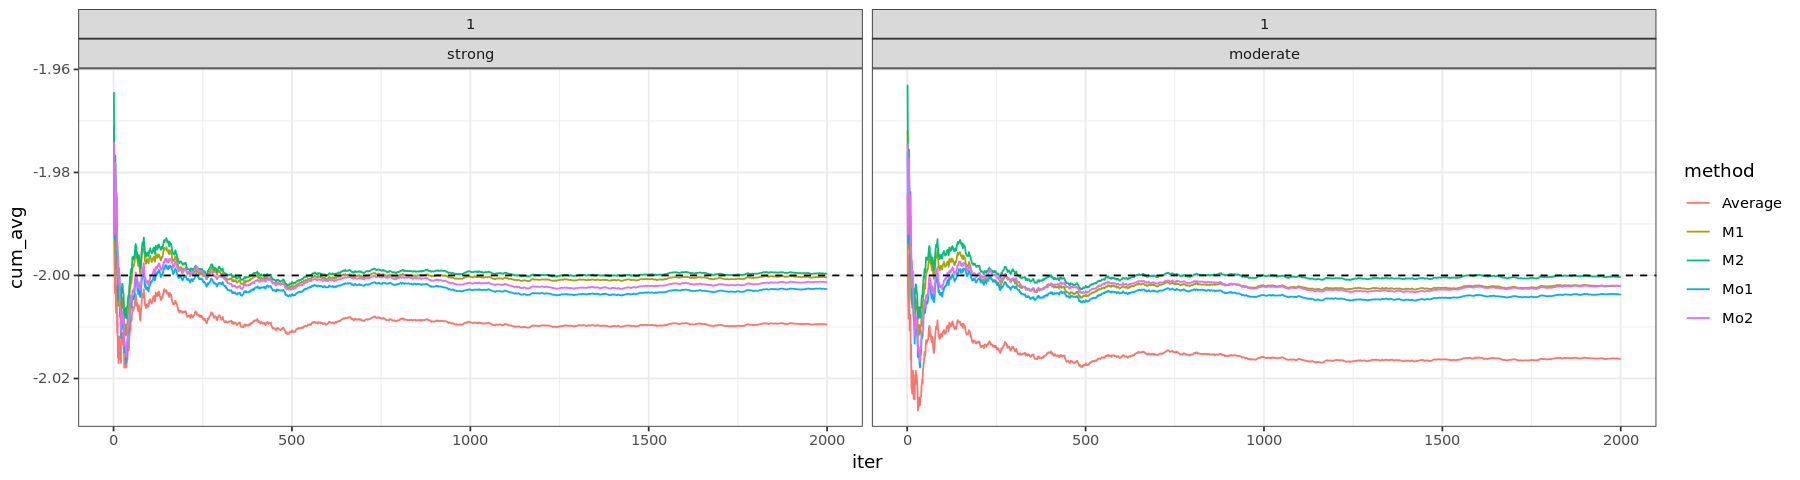

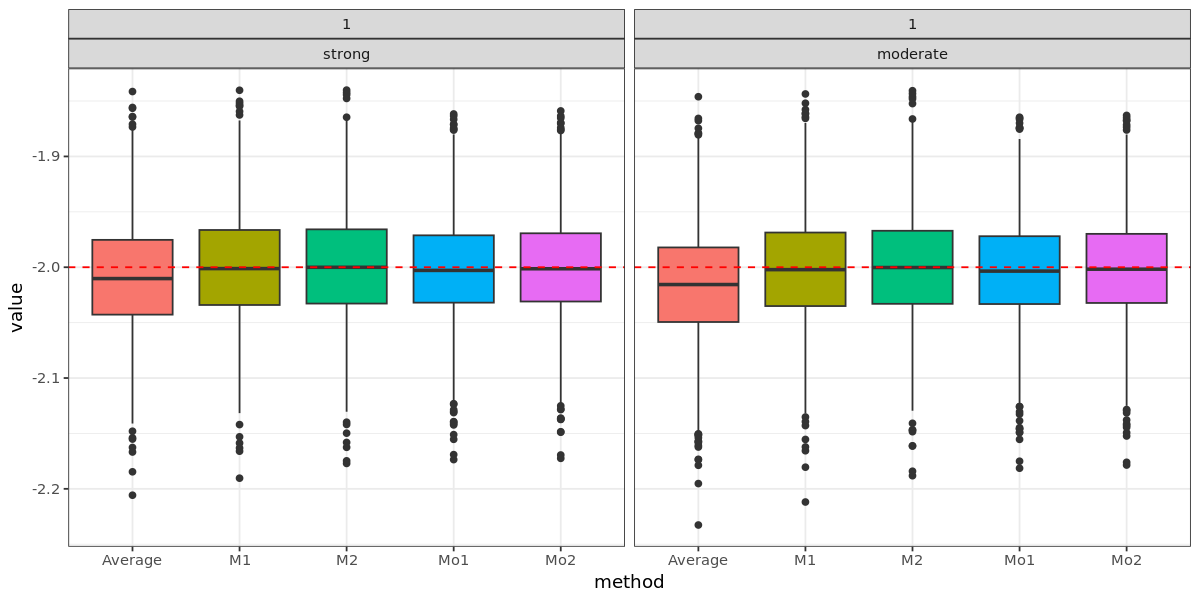

In [3]:
vec_file <- list.files(path = "output")

tib_out <- tibble()

for (
    path_cur in file.path(
        "output", 
        vec_file[str_detect(vec_file, "out_sim3mc_vgams\\d+_ip\\d+_psiEps\\d+.csv")] 
    )
) {
    tib_out <- bind_rows(
        tib_out, 
        read_csv(file = path_cur, show_col_types = FALSE) %>% 
            mutate(
                d = str_extract(path_cur, "(?<=_ip)\\d+") %>% as.numeric(), 
                psiEps = str_extract(path_cur, "(?<=_psiEps)\\d+") %>% 
                    str_replace("^0", "0.") %>% as.numeric(),
            )
    )
}

beta <- -2

tib_out <- tib_out %>% 
    filter_at(
        vars(Average:Mo2), 
        function(x) abs(x - beta) < 2 * abs(beta)
    ) %>% 
    group_by(rnd_np, d, psiEps) %>%
    # slice_head(n = 1) %>%
    summarise_at(
        vars(Average:Mo2),
        median
        # mean
    ) %>% 
    mutate() 

lab_psiEps <- c(
    "1" = "moderate", 
    "0.25" = "strong"
)

# options(repr.plot.width = 15, repr.plot.height = 8)

options(repr.plot.width = 15, repr.plot.height = 4)

tib_out %>% 
    pivot_longer(
        cols = Average:Mo2, 
        names_to = "method",
        values_to = "value"
    ) %>% 
    group_by(method, d, psiEps) %>% 
    mutate(
        cum_avg = cumsum(value) / row_number()
    ) %>%
    mutate(iter = factor(rnd_np) %>% as.numeric()) %>%
    ggplot() +
    geom_line(
        mapping = aes(x = iter, y = cum_avg, color = method)
    ) +
    geom_hline(yintercept = beta, linetype = "dashed") +
    # facet_grid(d ~ psiEps, labeller = labeller(psiEps = as_labeller(lab_psiEps))) +
    facet_wrap(~ d + psiEps, labeller = labeller(psiEps = as_labeller(lab_psiEps)), nrow = 1) +
    theme_bw() 

options(repr.plot.width = 10, repr.plot.height = 5)

tib_out %>%
    pivot_longer(
        cols = Average:Mo2, 
        names_to = "method",
        values_to = "value"
    ) %>% # group_by(method) %>% summarise(value = mean(value))
    # filter(
    #     str_detect(method, "Mo") == FALSE
    # ) %>% 
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = value, fill = method), 
        show.legend = FALSE
    ) + 
    geom_hline(yintercept = beta, linetype = "dashed", color = "red") +
    # facet_grid(d ~ psiEps, labeller = labeller(cor = lab_cor)) +
    facet_wrap(~ d + psiEps, labeller = labeller(psiEps = lab_psiEps), nrow = 1) +
    theme_bw() 

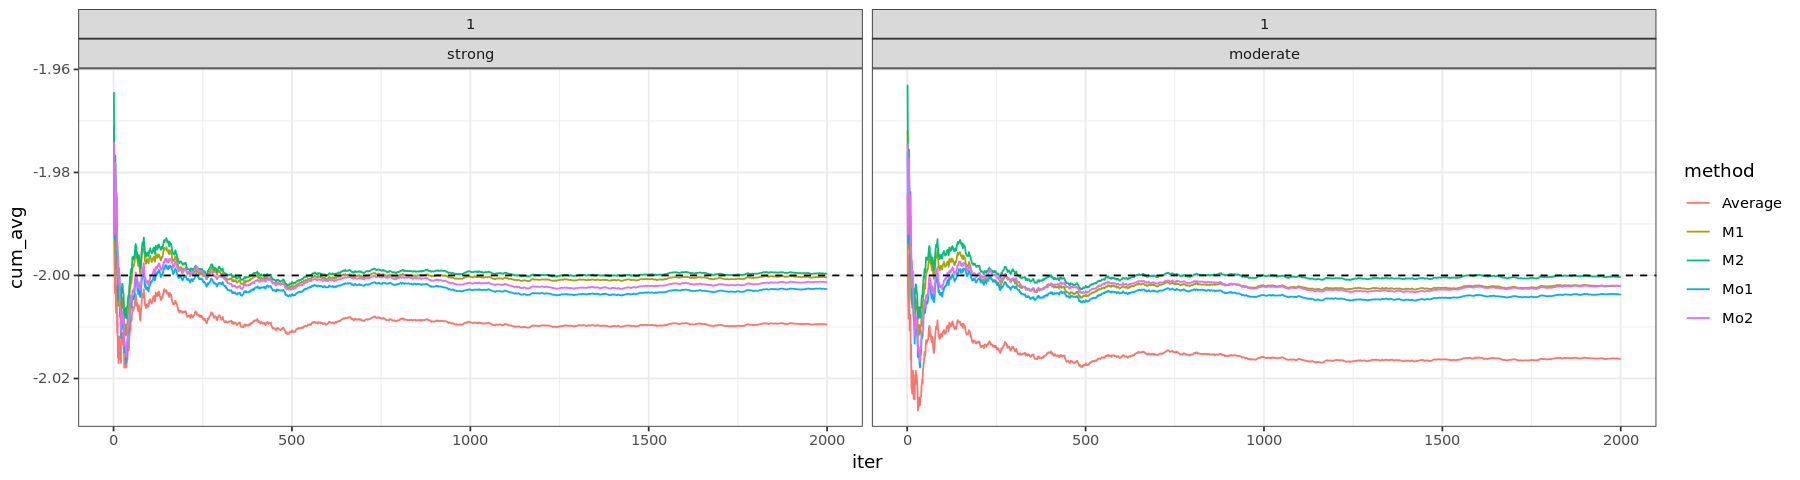

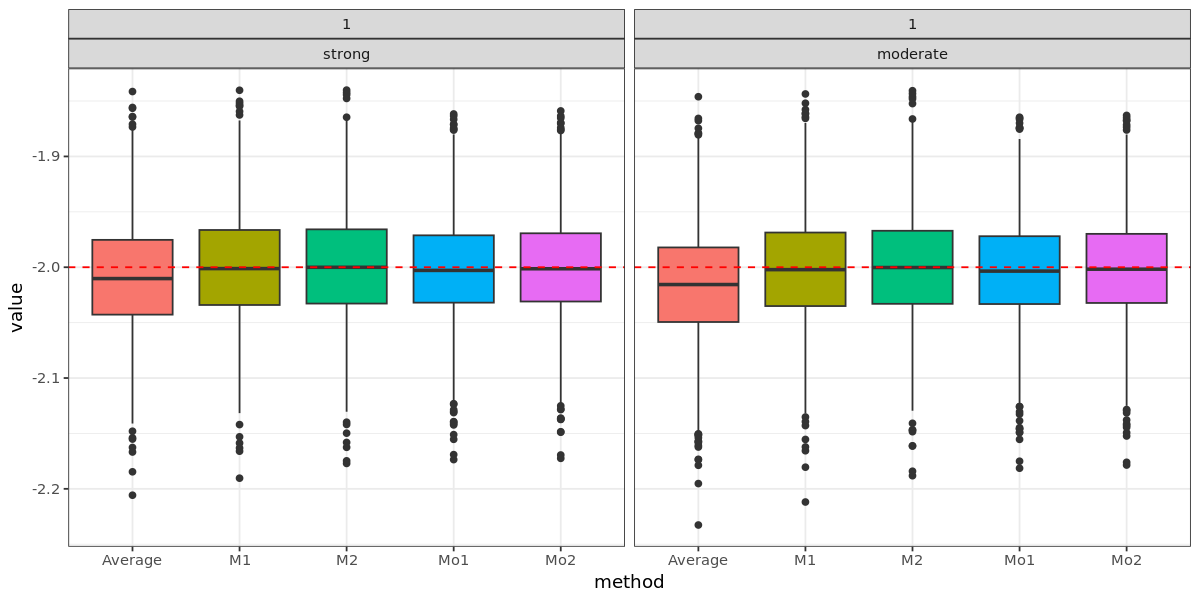

In [4]:
## continuous 
beta <- -2

tib_out <- tib_out %>% 
    filter_at(
        vars(Average:Mo2), 
        function(x) abs(x - beta) < 2 * abs(beta)
    ) %>% 
    group_by(rnd_np, d, psiEps) %>%
    # slice_head(n = 1) %>%
    summarise_at(
        vars(Average:Mo2),
        # median
        mean
    ) %>% 
    mutate() 

lab_psiEps <- c(
    "1" = "moderate", 
    "0.25" = "strong"
)

# options(repr.plot.width = 15, repr.plot.height = 8)

options(repr.plot.width = 15, repr.plot.height = 4)

tib_out %>% 
    pivot_longer(
        cols = Average:Mo2, 
        names_to = "method",
        values_to = "value"
    ) %>% 
    group_by(method, d, psiEps) %>% 
    mutate(
        cum_avg = cumsum(value) / row_number()
    ) %>%
    mutate(iter = factor(rnd_np) %>% as.numeric()) %>%
    ggplot() +
    geom_line(
        mapping = aes(x = iter, y = cum_avg, color = method)
    ) +
    geom_hline(yintercept = beta, linetype = "dashed") +
    # facet_grid(d ~ psiEps, labeller = labeller(psiEps = as_labeller(lab_psiEps))) +
    facet_wrap(~ d + psiEps, labeller = labeller(psiEps = as_labeller(lab_psiEps)), nrow = 1) +
    theme_bw() 

options(repr.plot.width = 10, repr.plot.height = 5)

tib_out %>%
    pivot_longer(
        cols = Average:Mo2, 
        names_to = "method",
        values_to = "value"
    ) %>% # group_by(method) %>% summarise(value = mean(value))
    # filter(
    #     str_detect(method, "Mo") == FALSE
    # ) %>% 
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = value, fill = method), 
        show.legend = FALSE
    ) + 
    geom_hline(yintercept = beta, linetype = "dashed", color = "red") +
    # facet_grid(d ~ psiEps, labeller = labeller(cor = lab_cor)) +
    facet_wrap(~ d + psiEps, labeller = labeller(psiEps = lab_psiEps), nrow = 1) +
    theme_bw() 

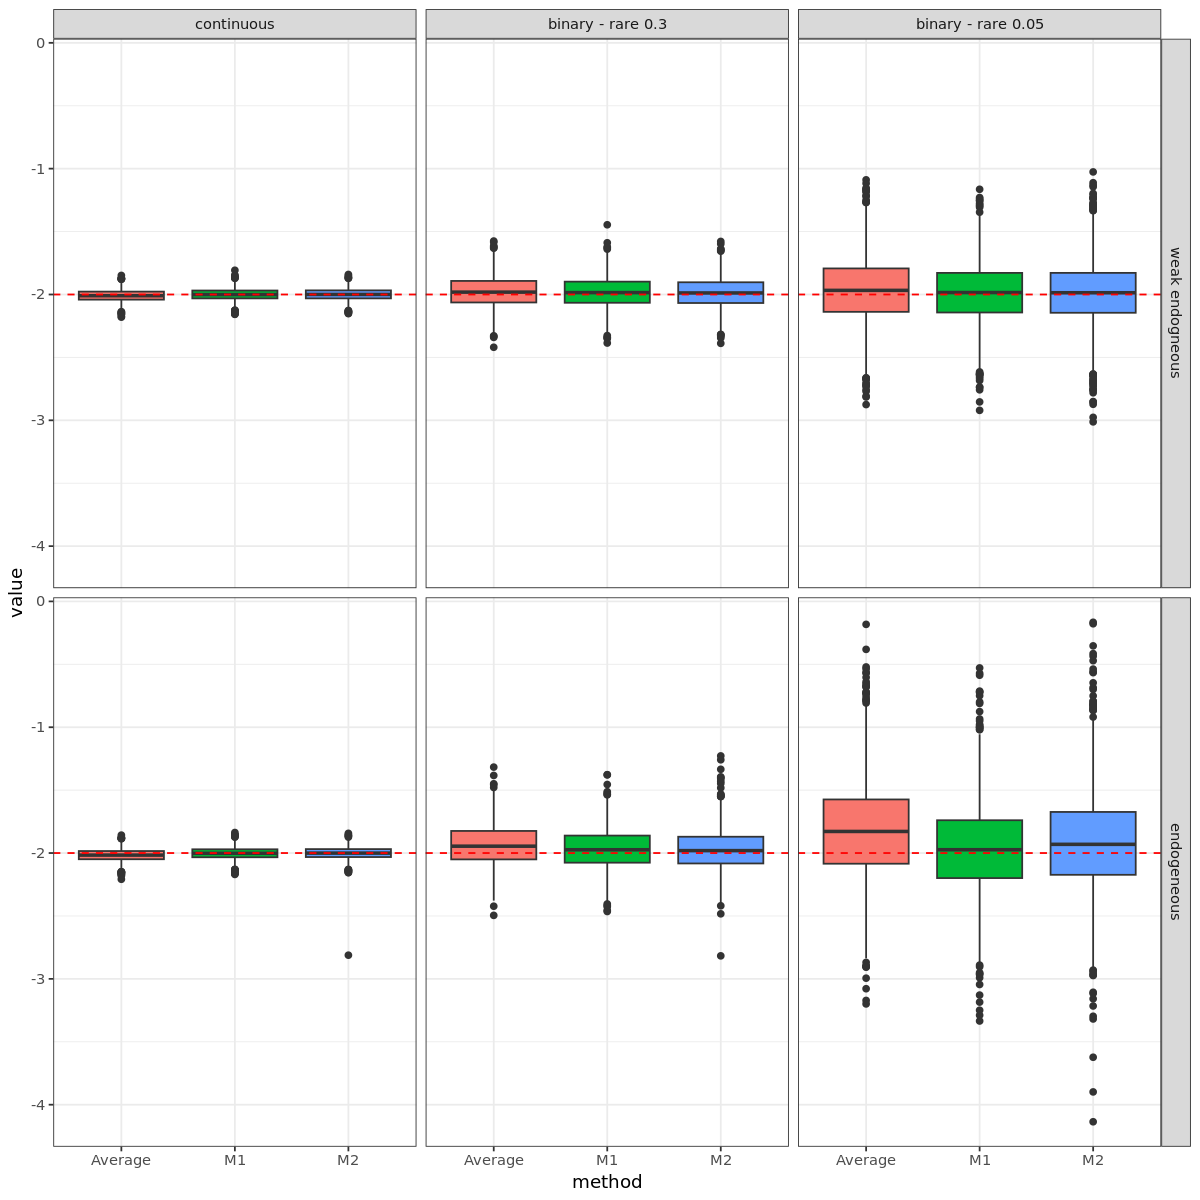

In [8]:
## sim3m cont / common_bin / rare_bin

vec_file <- list.files(path = "output")

tib_out <- tibble()

for (
    path_cur in file.path(
        "output", 
        vec_file[str_detect(vec_file, "out_sim3mr_edg_vgams\\d+_ip\\d+_eps\\d+.csv")] 
    )
) {
    tib_out <- bind_rows(
        tib_out, 
        read_csv(file = path_cur, show_col_types = FALSE) %>% 
            mutate(
                d = str_extract(path_cur, "(?<=_ip)\\d+") %>% as.numeric(), 
                # vgam = str_extract(path_cur, "(?<=_vgams)\\d+") %>% as.numeric(), 
                edg = str_extract(path_cur, "(?<=_eps)\\d+") %>% 
                    str_replace("^0", "0.") %>% 
                    str_replace("^1", "1.") %>% 
                    as.numeric(),
            )
    )
}

for (
    path_cur in file.path(
        "output", 
        vec_file[str_detect(vec_file, "out_sim3mc_vgams\\d+_ip1_psiEps\\d+.csv")] 
    )
) {
    tib_out <- bind_rows(
        tib_out, 
        read_csv(file = path_cur, show_col_types = FALSE) %>% 
            mutate(
                d_tag = "cont",
                psiEps = str_extract(path_cur, "(?<=_psiEps)\\d+") %>% 
                    str_replace("^0", "0.") %>% as.numeric(),
            )
    )
}


tib_out <- tib_out %>% 
    mutate(cor_tag = ifelse(edg < 1.0, "moderate", "strong")) %>% 
    mutate(
        cor_tag = case_when(
            edg < 1.0 ~ "moderate", 
            edg > 1.0 ~ "strong", 
            psiEps == 1.0 ~ "moderate",
            psiEps == 0.25 ~ "strong"
        )
    ) %>%
    mutate(d_tag = case_when(
        d == 1 ~ "binary_30", 
        d == 2 ~ "binary_5", 
        d_tag == "cont" ~ "cont" 
    )) %>% 
    select(-d, -edg, -rare_rate, -cor_dz, -psiEps)

beta <- -2

tib_out <- tib_out %>% 
    filter_at(
        vars(Average:Mo2), 
        function(x) abs(x - beta) < 2 * abs(beta)
    ) %>% 
    group_by(rnd_np, d_tag, cor_tag) %>%
    # slice_head(n = 1) %>%
    summarise_at(
        vars(Average:Mo2),
        # median
        mean
    ) %>% 
    mutate() 

tib_out_sim3 <- tib_out

lab_d <- c(
    "cont" = "continuous",
    "binary_30" = "binary - rare 0.3", 
    "binary_5" = "binary - rare 0.05"
)

options(repr.plot.width = 10, repr.plot.height = 10)

tib_out %>%
    pivot_longer(
        cols = Average:Mo2, 
        names_to = "method",
        values_to = "value"
    ) %>% # group_by(method) %>% summarise(value = mean(value))
    filter(
        str_detect(method, "Mo") == FALSE
    ) %>% 
    mutate(
        d_tag = factor(d_tag, levels = c("cont", "binary_30", "binary_5")), 
        cor_tag = factor(cor_tag, levels = c("strong", "moderate"))
    ) %>%
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = value, fill = method), 
        show.legend = FALSE
    ) + 
    geom_hline(yintercept = beta, linetype = "dashed", color = "red") +
    facet_grid(
        cor_tag ~ d_tag , 
        labeller = labeller(
            d_tag = lab_d,
            cor_tag = c("moderate" = "endogeneous", "strong" = "weak endogneous")
        )
    ) +
    theme_bw() 

# ggsave(filename = "output/out_sim3m_edg_cpr.pdf", width = 10, height = 10)




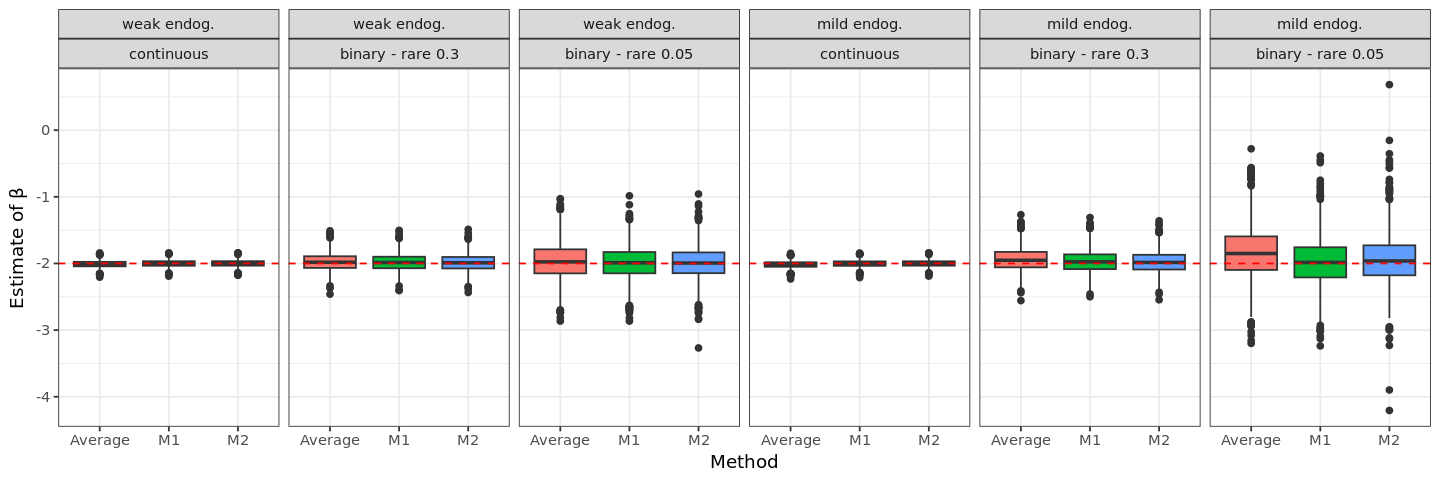

In [24]:
## tag - comb

options(repr.plot.width = 12, repr.plot.height = 4)

plt_sim3 <- tib_out %>%
    pivot_longer(
        cols = Average:Mo2, 
        names_to = "method",
        values_to = "value"
    ) %>% # group_by(method) %>% summarise(value = mean(value))
    filter(
        str_detect(method, "Mo") == FALSE
    ) %>% 
    mutate(
        d_tag = factor(d_tag, levels = c("cont", "binary_30", "binary_5")), 
        cor_tag = factor(cor_tag, levels = c("strong", "moderate"))
    ) %>%
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = value, fill = method), 
        show.legend = FALSE
    ) + 
    geom_hline(yintercept = beta, linetype = "dashed", color = "red") +
    facet_wrap(
        ~ cor_tag + d_tag, 
        labeller = labeller(
            d_tag = lab_d,
            cor_tag = c("moderate" = "mild endog.", "strong" = "weak endog.")
        ), 
        nrow = 1
    ) +
    labs(
        x = "Method", 
        y = expression("Estimate of" ~ beta), 
    ) +
    theme_bw() 

plt_sim3

In [70]:
## save plt_sim3
ggsave(
    filename = "output/fig_sim3mr_edg_cpr.pdf", 
    plot = plt_sim3, 
    width = 12, 
    height = 5
)

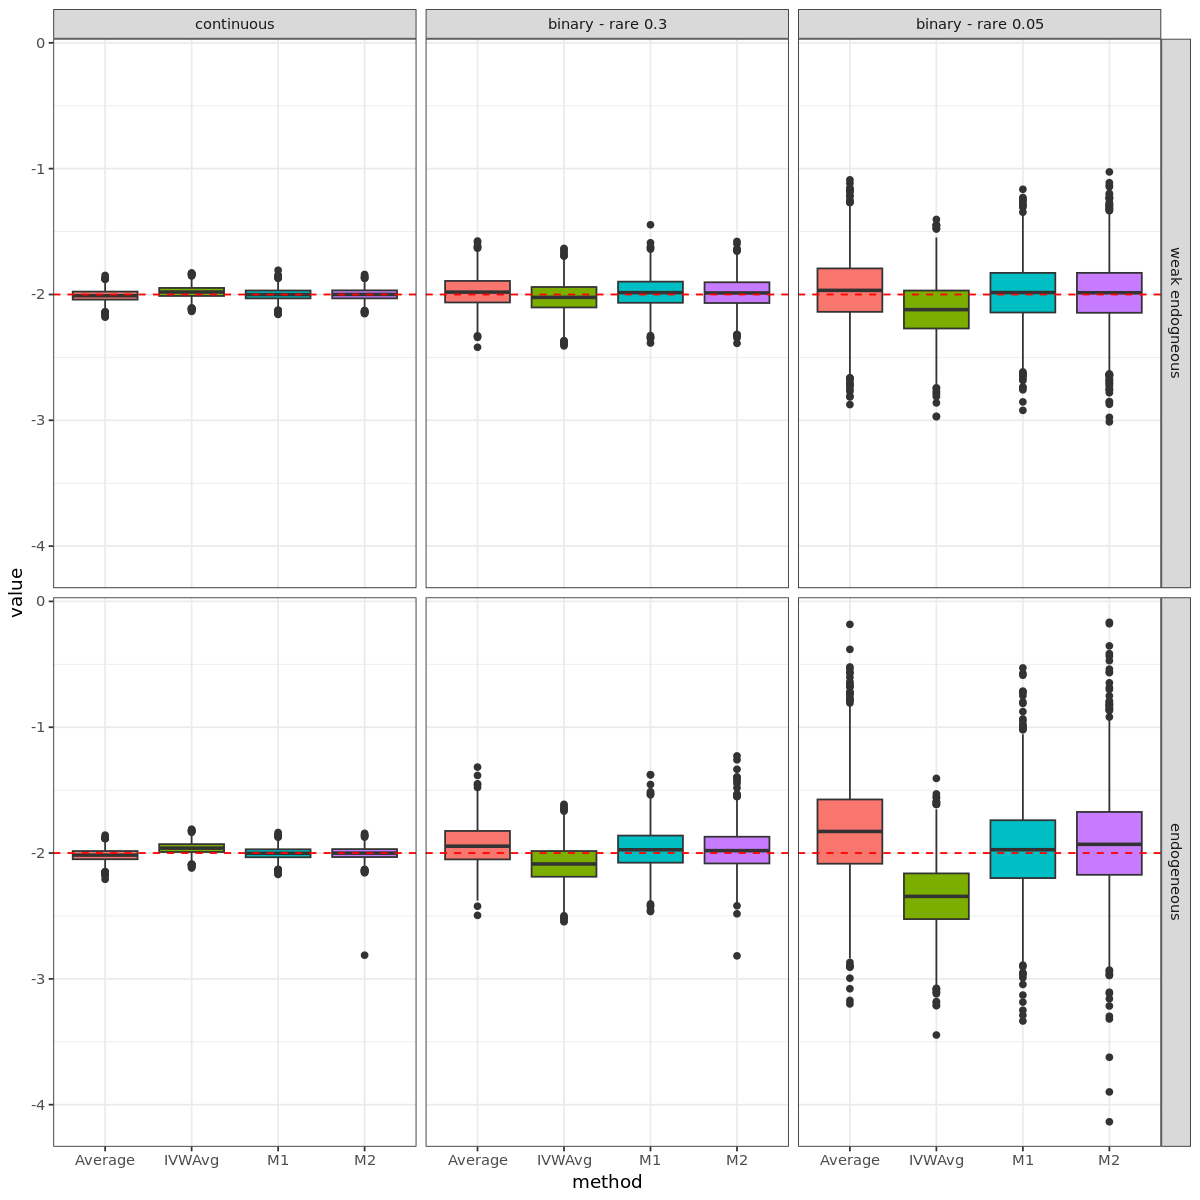

In [56]:
## sim3m - ivwa cont / common_bin / rare_bin

vec_file <- list.files(path = "output")

tib_out <- tibble()

for (
    path_cur in file.path(
        "output", 
        vec_file[str_detect(vec_file, "out_sim3mr_edg_ivwa_vgams\\d+_ip\\d+_eps\\d+.csv")] 
    )
) {
    tib_out <- bind_rows(
        tib_out, 
        read_csv(file = path_cur, show_col_types = FALSE) %>% 
            mutate(
                d = str_extract(path_cur, "(?<=_ip)\\d+") %>% as.numeric(), 
                # vgam = str_extract(path_cur, "(?<=_vgams)\\d+") %>% as.numeric(), 
                edg = str_extract(path_cur, "(?<=_eps)\\d+") %>% 
                    str_replace("^0", "0.") %>% 
                    str_replace("^1", "1.") %>% 
                    as.numeric(),
            )
    )
}

for (
    path_cur in file.path(
        "output", 
        vec_file[str_detect(vec_file, "out_sim3mc_ivwa_vgams\\d+_ip1_psiEps\\d+.csv")] 
    )
) {
    tib_out <- bind_rows(
        tib_out, 
        read_csv(file = path_cur, show_col_types = FALSE) %>% 
            mutate(
                d_tag = "cont",
                psiEps = str_extract(path_cur, "(?<=_psiEps)\\d+") %>% 
                    str_replace("^0", "0.") %>% as.numeric(),
            )
    )
}


tib_out <- tib_out %>% 
    mutate(cor_tag = ifelse(edg < 1.0, "moderate", "strong")) %>% 
    mutate(
        cor_tag = case_when(
            edg < 1.0 ~ "moderate", 
            edg > 1.0 ~ "strong", 
            psiEps == 1.0 ~ "moderate",
            psiEps == 0.25 ~ "strong"
        )
    ) %>%
    mutate(d_tag = case_when(
        d == 1 ~ "binary_30", 
        d == 2 ~ "binary_5", 
        d_tag == "cont" ~ "cont" 
    )) %>% 
    select(-d, -edg, -rare_rate, -cor_dz, -psiEps)

beta <- -2

tib_out <- tib_out %>% 
    # filter_at(
    #     vars(Average:IVWAvg), 
    #     function(x) abs(x - beta) < 2 * abs(beta)
    # ) %>% 
    group_by(rnd_np, d_tag, cor_tag) %>%
    summarise_at(
        vars(Average:IVWAvg),
        mean
    ) %>% 
    mutate() 

tib_out <- tib_out_sim3 %>% 
    left_join(
        tib_out %>% 
            select(rnd_np, d_tag, cor_tag, IVWAvg), 
        by = c("rnd_np", "d_tag", "cor_tag" = "cor_tag")
    )

lab_d <- c(
    "cont" = "continuous",
    "binary_30" = "binary - rare 0.3", 
    "binary_5" = "binary - rare 0.05"
)

options(repr.plot.width = 10, repr.plot.height = 10)

tib_out %>%
    pivot_longer(
        cols = Average:IVWAvg, 
        names_to = "method",
        values_to = "value"
    ) %>% # group_by(method) %>% summarise(value = mean(value))
    filter(
        str_detect(method, "Mo") == FALSE
    ) %>% 
    mutate(
        d_tag = factor(d_tag, levels = c("cont", "binary_30", "binary_5")), 
        cor_tag = factor(cor_tag, levels = c("strong", "moderate"))
    ) %>%
    drop_na() %>%
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = value, fill = method), 
        show.legend = FALSE
    ) + 
    geom_hline(yintercept = beta, linetype = "dashed", color = "red") +
    facet_grid(
        cor_tag ~ d_tag , 
        labeller = labeller(
            d_tag = lab_d,
            cor_tag = c("moderate" = "endogeneous", "strong" = "weak endogneous")
        )
    ) +
    theme_bw() 





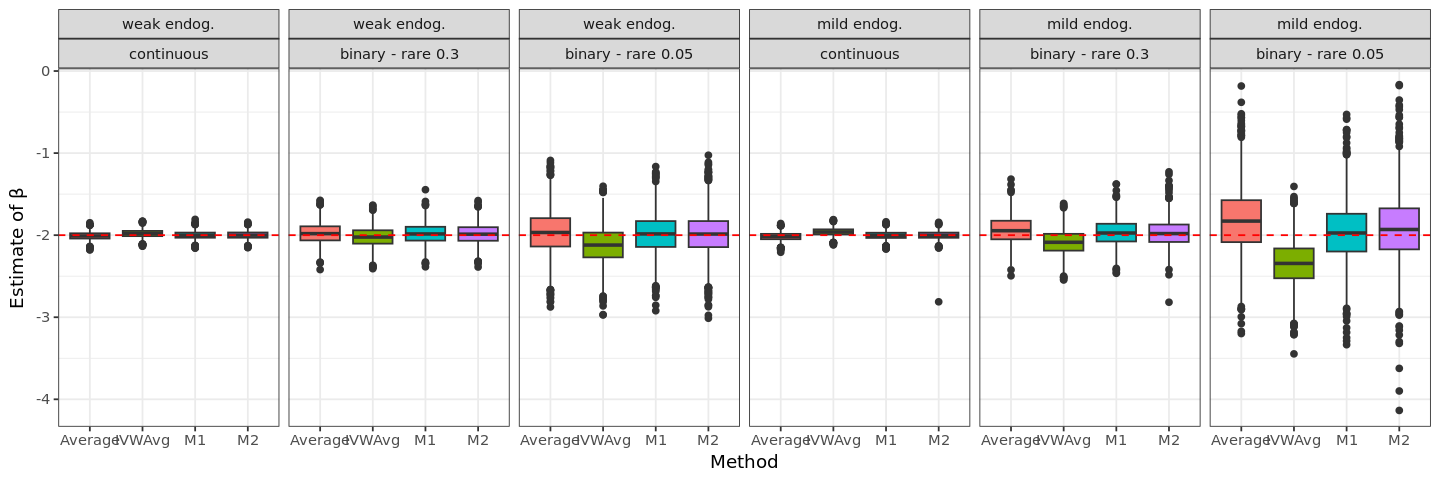

In [57]:
## tag - comb

options(repr.plot.width = 12, repr.plot.height = 4)

plt_sim3_iv <- tib_out %>%
    pivot_longer(
        cols = Average:IVWAvg, 
        names_to = "method",
        values_to = "value"
    ) %>% # group_by(method) %>% summarise(value = mean(value))
    filter(
        str_detect(method, "Mo") == FALSE
    ) %>% 
    mutate(
        d_tag = factor(d_tag, levels = c("cont", "binary_30", "binary_5")), 
        cor_tag = factor(cor_tag, levels = c("strong", "moderate"))
    ) %>%
    drop_na() %>%
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = value, fill = method), 
        show.legend = FALSE
    ) + 
    geom_hline(yintercept = beta, linetype = "dashed", color = "red") +
    facet_wrap(
        ~ cor_tag + d_tag, 
        labeller = labeller(
            d_tag = lab_d,
            cor_tag = c("moderate" = "mild endog.", "strong" = "weak endog.")
        ), 
        nrow = 1
    ) +
    labs(
        x = "Method", 
        y = expression("Estimate of" ~ beta), 
    ) +
    theme_bw() 

plt_sim3_iv

# Combination

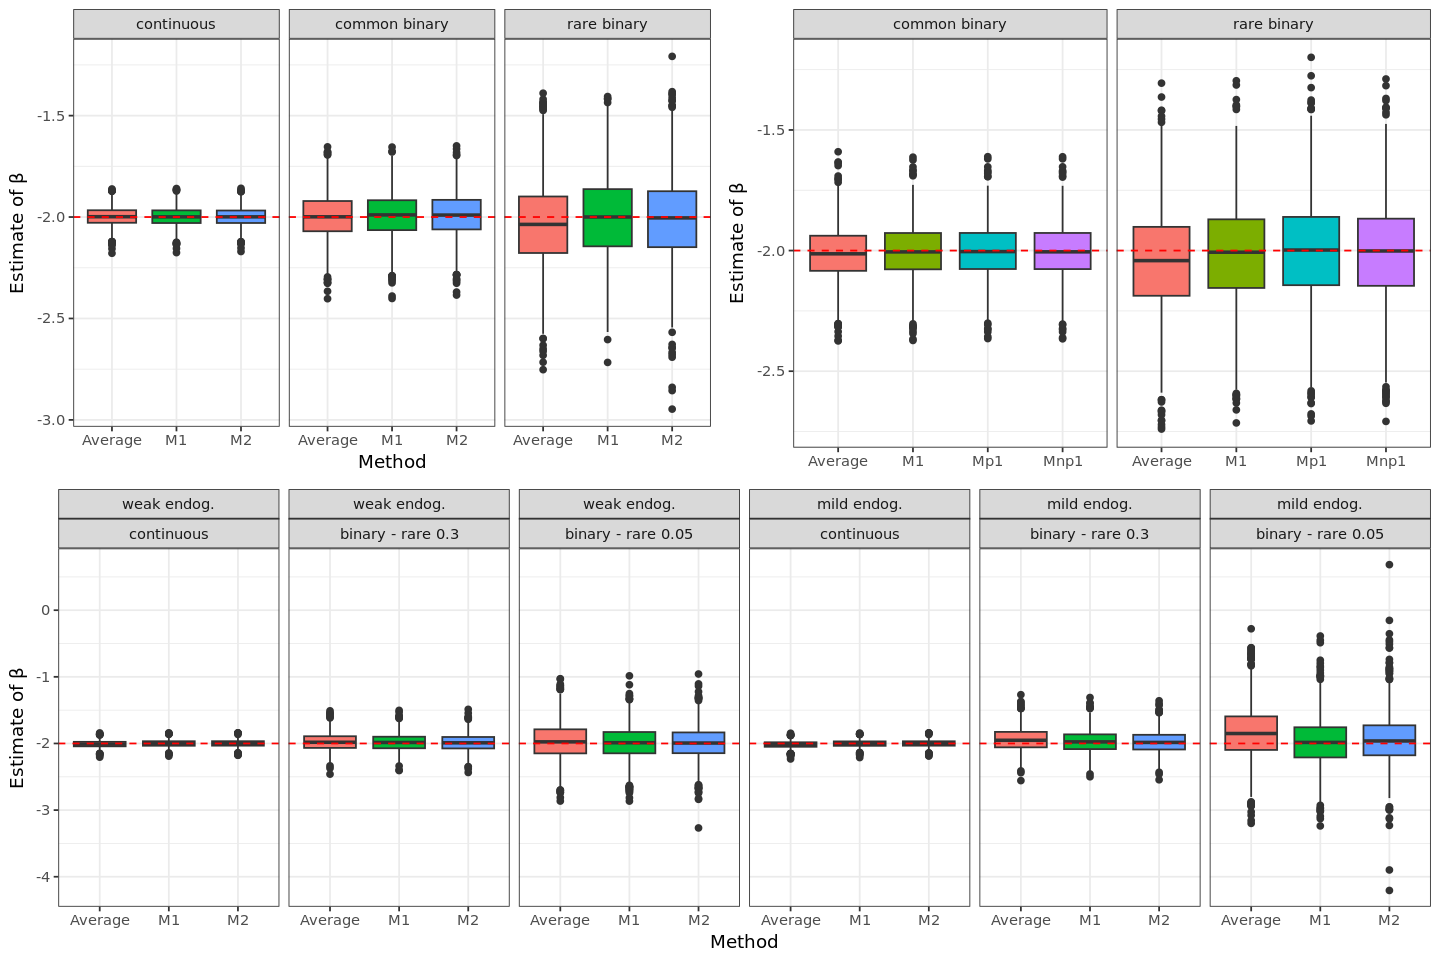

In [25]:
## abandoned - not used
options(repr.plot.width = 12, repr.plot.height = 8)

grid.arrange(
    grid.arrange(
        plt_sim2, 
        plt_sim2_cs + xlab(NULL), 
        nrow = 1
    ),
    plt_sim3, 
    nrow = 2
)

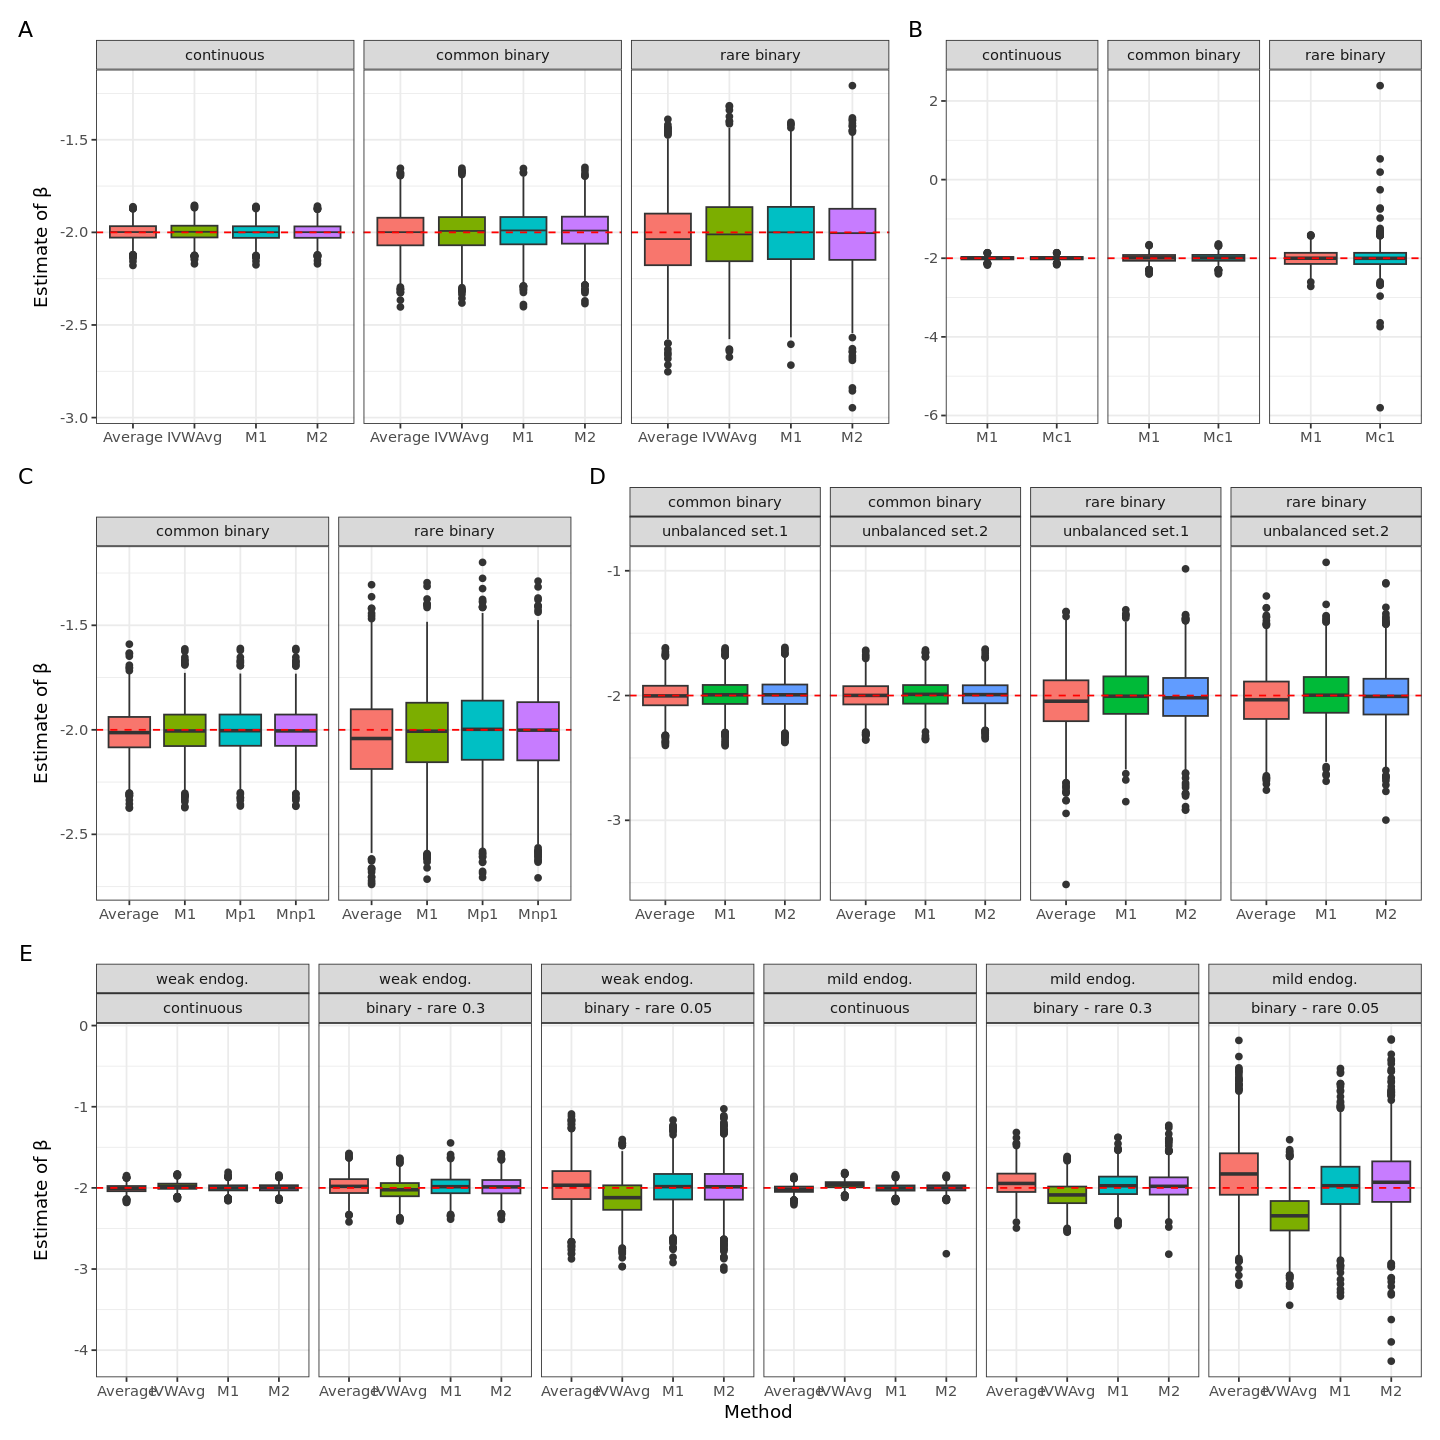

In [113]:
options(repr.plot.width = 12, repr.plot.height = 12)

plt_comb <- (
    (plt_sim2_ivw + xlab(NULL)) + 
    (plt_sim2p + xlab(NULL) + ylab(NULL)) + 
    plot_layout(nrow = 1, widths = c(1, .6))
) / (
    (plt_sim2_cs + xlab(NULL)) + 
    (plt_sim2ub + xlab(NULL) + ylab(NULL)) +
    plot_layout(nrow = 1, widths = c(.6, 1))
) / (
    plt_sim3_iv
) +
    plot_layout(ncol = 1, heights = c(1, 1, 1)) + 
    plot_annotation(
        tag_levels = list(c("A", "B", "C", "D", "E")),
    ) & 
    theme(
        # plot.tag.position = c(0.02, 0.95)
    ) # & scale_fill_npg()

plt_comb

# ggsave(
#     filename = "output/out_comb.pdf", 
#     plot = plt_comb, 
#     width = 15, height = 15, units = "in"
# )

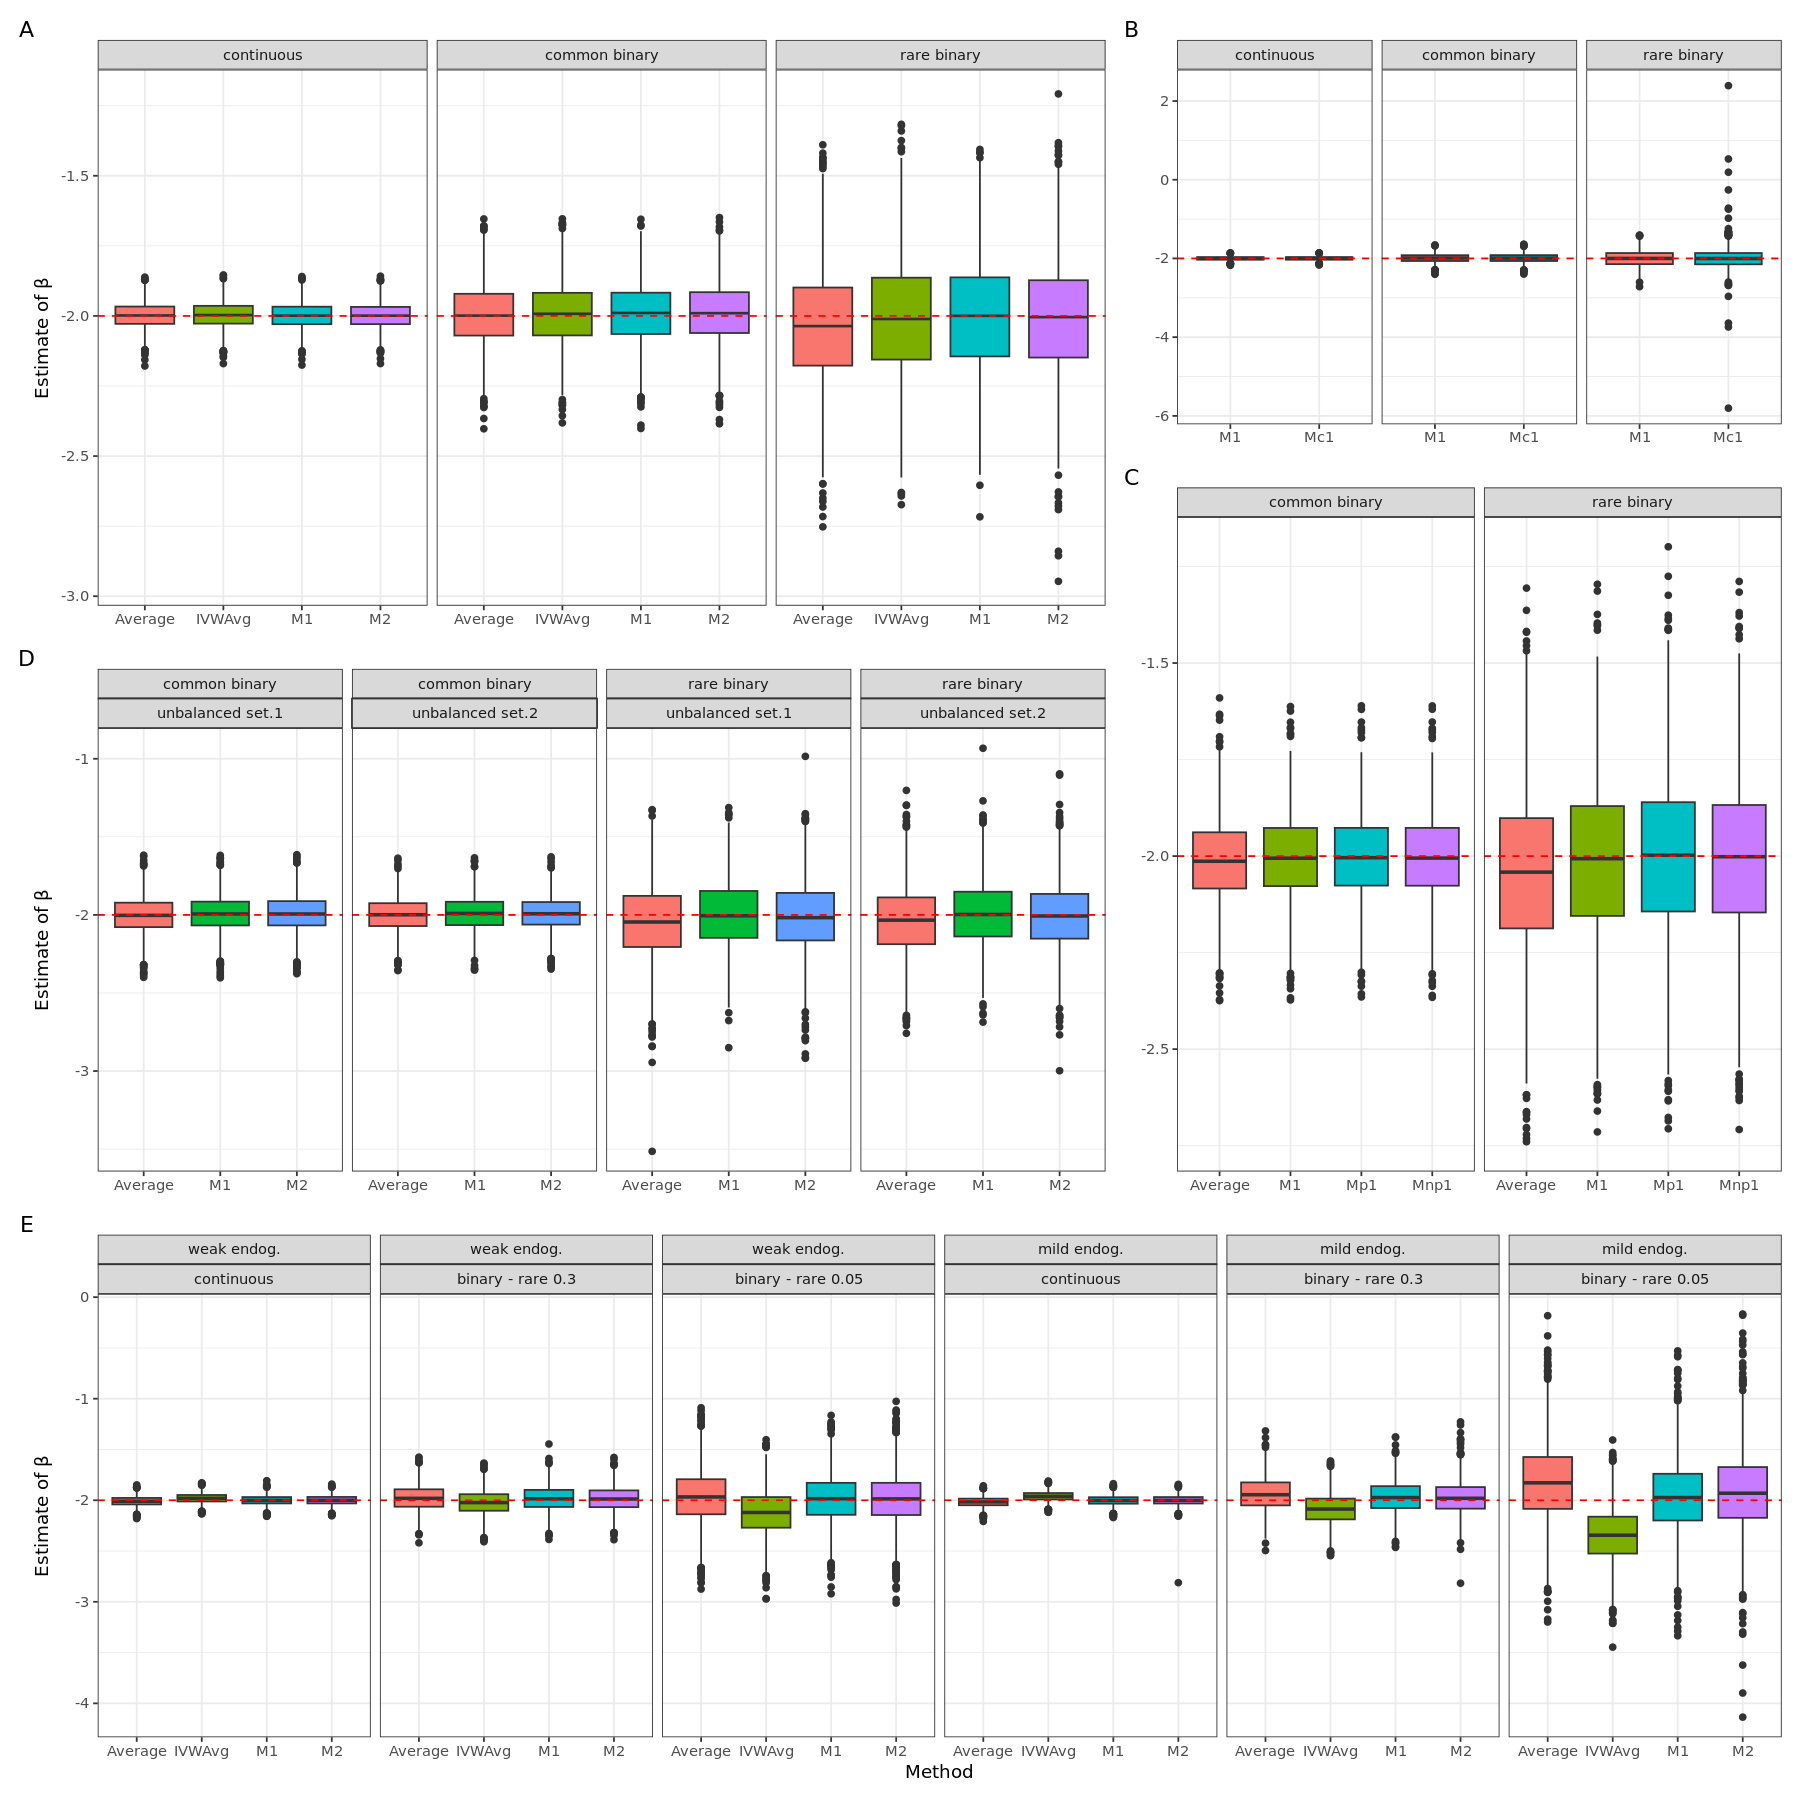

In [116]:
options(repr.plot.width = 15, repr.plot.height = 15)

design <- "AB
           AC
           DC
           EE"

plt_comb <- (plt_sim2_ivw + xlab(NULL)) + 
    (plt_sim2p + xlab(NULL) + ylab(NULL)) + 
    (plt_sim2_cs + xlab(NULL) + ylab(NULL)) + 
    (plt_sim2ub + xlab(NULL)) +
    plt_sim3_iv + 
    plot_layout(
        design = design, 
        width = c(1, .6), 
        height = c(.8, .2, 1, 1)
    ) +
    plot_annotation(
        tag_levels = list(c("A", "B", "C", "D", "E")),
    ) & 
    theme(
        # plot.tag.position = c(0.01, 0.97),
    ) 

plt_comb

ggsave(
    filename = "output/out_comb.pdf", 
    plot = plt_comb, 
    width = 15, height = 15, units = "in"
)